In [1]:
#Importes que uso que não compõe o livro
import requests
from io import BytesIO

# Exploração de Dados

## Carregar Dados

Crie um novo Jupyter Notebook. Digite import pandas as pd na nova célula.  
Quando você executar essa célula, a biblioteca pandas será carregada em seu ambiente de computação. É comum a importação com “as” para que seja criado um alias para a biblioteca. Agora usaremos o pandas para carregar o arquivo de dados. Ele está no formato do Microsoft Excel, logo, podemos usar pd.read_excel.  
Nota: Para obter mais informações sobre todas as opções possíveis para pd.read_excel, consulte a documentação a seguir:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html.

In [2]:
import pandas as pd

Importe o dataset, que está no formato do Excel, como um DataFrame usando o método pd.read_excel(), como mostrado neste fragmento:
df = pd.read_excel(’../Data/default_of_credit_card_clients_courseware_version_1_21_19.xls’)  
Observe que você precisa apontar o leitor do Excel para o local onde o arquivo está localizado. Se ele estiver no mesmo diretório de seu notebook, é possível inserir apenas o nome do arquivo. O método pd.read_excel carregará o arquivo do Excel em um DataFrame, que chamamos de df. Agora o poder do pandas está disponível para nós.

In [3]:
# URL do arquivo no GitHub
url = 'https://github.com/MaykollRocha/Data_Sets/raw/main/default_of_credit_card_clients__courseware_version_1_21_19.xls'

# Fazendo o download do arquivo
response = requests.get(url)

# Lendo o arquivo Excel
df = pd.read_excel(BytesIO(response.content))

Observe que você precisa apontar o leitor do Excel para o local onde o arquivo está localizado. Se ele estiver no mesmo diretório de seu notebook, é possível inserir apenas o nome do arquivo. O método pd.read_excel carregará o arquivo do Excel em um DataFrame, que chamamos de df. Agora o poder do pandas está disponível para nós.  
OBS: No meu caso ele se encontra no gitHub publicamente pois publiquei lá

Use o método .shape para examinar o número de linhas e colunas, como mostrado na
linha de código a seguir:

In [4]:
df.shape

(30000, 25)

Ela deve coincidir com (30000, 25). Caso contrário, será preciso inspecionar as diversas opções de pd.read_excel para ver se é necessário ajustar algo.  
Com esse exercício, carregamos com sucesso nosso dataset no Jupyter Notebook. Você também pode examinar os métodos .info() e .head(), que fornecerão informações sobre todas as colunas e mostrarão as primeiras linhas do DataFrame, respectivamente. Agora você já está com seus dados no pandas.  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Como observação final, embora já deva ter ficado claro, é bom ressaltar que, se você definir uma variável em uma única célula de código, ela ficará disponível em outras células de código dentro do notebook. As células de código de um notebook compartilham o escopo contanto que o kernel esteja sendo executado.

## Verificando a Integridade Básica dos Dados

Neste exercício, executaremos uma verificação básica para saber se o dataset contém o que esperamos e examinaremos se há o número correto de amostras.  
Os dados devem ter observações referentes a 30.000 contas de crédito. Embora haja 30.000 linhas, também devemos verificar se existem 30.000 IDs de contas exclusivos. É possível que, se a consulta SQL usada para gerar os dados foi executada com um esquema desconhecido, os valores que deveriam ser exclusivos na verdade não o sejam.  
Para examinar isso, podemos verificar se o número de IDs de contas exclusivos é igual ao número de linhas. Execute as etapas a seguir para fazer o exercício:

Examine o nome das colunas executando o comando a seguir na célula:  
df.columns  
O método .columns do DataFrame está sendo empregado para examinarmos os nomes de
todas as colunas. Você obterá a saída a seguir quando executar a célula:

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Como podemos ver, os nomes de todas as colunas estão listados na saída. A coluna de IDs de contas é denominada ID. As outras colunas parecem ser as características, com a última coluna sendo a variável de resposta. Examinaremos resumidamente as informações do dataset que nos foi dado pelo cliente:
* LIMIT_BAL: Valor do crédito fornecido (em novos dólares taiwaneses (NT)) inclusive
o conteúdo do consumidor individual e familiar (complementar).
* SEX: Gênero (1 = masculino; 2 = feminino)
Nota: Não usaremos os dados de gênero para tomar as decisões de solvibilidade
devido a considerações éticas.
* EDUCATION: Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 =
outros).
* MARRIAGE: Estado civil (1 = casado; 2 = solteiro; 3 = outros).
* AGE: Idade (ano).
* PAY_1-PAY_6: Registro de pagamentos passados. Pagamentos mensais passados,
registrados de abril a setembro, são armazenados nessas colunas. PAY_1: representa o status de reembolso em setembro; PAY_2 = status de reembolso em agosto; e assim por diante até PAY_6, que representa o status de reembolso em abril.  
A escala de medida do status de reembolso é a seguinte: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses no pagamento; e assim por diante até 8 = atraso de oito meses no pagamento; 9 = atraso de nove meses ou mais no pagamento.
* BILL_AMT1-BILL_AMT6: Valor da fatura (em novos dólares taiwaneses).
BILL_AMT1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor
da fatura em agosto; e assim por diante até BILL_AMT7, que representa o valor da
fatura em abril.
* PAY_AMT1-PAY_AMT6: Valor de pagamentos anteriores (novos dólares taiwaneses).
PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago
em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.  
Usaremos o método .head() na próxima etapa para observar as primeiras linhas de
dados.

Digite o comando a seguir na célula subsequente:  
df.head()  
Você verá a seguinte saída:  

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


A coluna ID parece conter identificadores exclusivos. Para verificar se isso ocorre realmente em todo o dataset, podemos contar o número de valores exclusivos usando o método .nunique() na série (ou seja, coluna) ID. Primeiro, selecionaremos a coluna usando colchetes.

Selecione a coluna alvo (ID) e conte os valores exclusivos usando o comando a seguir:  
df[’ID’].nunique()  
É possível ver que nessa saída teremos 29.687 entradas exclusivas.  

In [9]:
df['ID'].nunique()

29687

Execute o comando a seguir para obter o número de linhas do dataset:  
df.shape  
Como podemos ver na saída, temos um total de 30.000 linhas no dataset.
Identificamos que o número de IDs exclusivos é menor do que o número de linhas. Isso significa que ID não é um identificador exclusivo para linhas de dados, como pensávamos.  
Sabemos então que há alguma duplicação de IDs. No entanto, em que quantidade? Um
único ID está sendo duplicado várias vezes? Quantos IDs estão sendo duplicados?  
Podemos usar o método .value_counts() na série ID para começar a responder a essas perguntas. Ele é semelhante a um procedimento group by/count em SQL e listará os IDs exclusivos e a frequência com que ocorrem. Executaremos essa operação na próxima etapa e armazenaremos as contagens de valores em uma variável id_counts.  

In [10]:
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
ad23fe5c-7b09,2
1fb3e3e6-a68d,2
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2


Observe que .head() retorna as cinco primeiras linhas por padrão. Você pode especificar o número de itens a serem exibidos passando o número desejado nos parênteses.

Exiba o número de entradas duplicadas agrupadas executando outra contagem de valores:  
id_counts.value_counts()  
Na saída anterior e na contagem de valores inicial, podemos ver que a maioria dos IDs
ocorre exatamente uma única vez, como esperado. No entanto, 313 IDs ocorrem duas
vezes. Logo, nenhum ID ocorre mais do que duas vezes. De posse dessas informações, estamos prontos para começar a examinar mais detalhadamente esse problema de qualidade de dados e corrigi-lo. Criaremos máscaras booleanas para limpar melhor os dados.

In [11]:
id_counts.value_counts()

,count
count,
1,29374
2,313


Nesse exercício, com nosso connhecimento dos arrays booleanos, examinaremos alguns dos IDs duplicados que descobrimos. No Exercício 3, verificamos que nenhum ID aparece mais de duas vezes. Podemos usar essa informação para localizar os IDs duplicados e examiná-los. Em seguida, tomaremos medidas para remover linhas de qualidade duvidosa do dataset. Execute as etapas a seguir para fazer o exercício:

Continuando onde paramos, queremos os índices da série id_counts cuja contagem é 2 para localizar as duplicadas. Atribuiremos os IDs duplicados a uma variável chamada duple_mask e exibiremos os cinco primeiros IDs duplicados usando os comandos a seguir:  


In [12]:
dupe_mask = id_counts == 2


Você obterá a seguinte saída:

In [13]:
dupe_mask[0:5]

,count
ID,
ad23fe5c-7b09,True
1fb3e3e6-a68d,True
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True


Observe que, na saída anterior, estamos exibindo só as cinco primeiras entradas usando dupe_mask para ilustrar o conteúdo desse array. Como sempre, você pode editar os índices  nos colchetes ([]) para alterar o número de entradas exibidas.  
Nossa próxima etapa é usar a máscara lógica para selecionar os IDs que estão duplicados.  
Os próprios IDs foram incluídos como índice da série id_count. Podemos acessar o índice para usar nossa máscara lógica para fins de seleção.  

Acesse o índice de id_count e exiba os cinco primeiras linhas como contexto usando o comando a seguir:  
id_counts.index[0:5]  
Com essa instrução, você obterá a seguinte saída:

In [14]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

Selecione e armazene os IDs duplicados em uma nova variável chamada dupe_ids usando o comando a seguir:  

In [15]:
dupe_ids = id_counts.index[dupe_mask]

Converta dupe_ids em uma lista e obtenha o seu tamanho usando os seguintes comandos:

In [16]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

Você deve como saída o valor 313. Alteramos a variável dupe_ids para uma lista, já que precisaremos dela nessa forma em etapas futuras. A lista tem um tamanho igual a 313, como pode ser visto na saída anterior, que coincide com o número de IDs duplicados que obtivemos na contagem de valores.

Verificaremos os dados de dupe_ids exibindo as cinco primeiras entradas com o comando a seguir:

In [17]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

Podemos observar na saída anterior que a lista contém as entradas de IDs duplicados requeridas. Estamos prontos para examinar os dados dos IDs de nossa lista de duplicatas. Especificamente, queremos examinar os valores das características, para ver o que, se houver algo, há de diferente entre essas entradas duplicadas. Usaremos os métodos .isin e .loc para esse fim.    
Usando os três primeiros IDs de nossa lista de duplicatas, dupe_ids[0:3], primeiro queremos encontrar as linhas que contêm esses IDs. Se passarmos essa lista de IDs para o método .isin da série ID, ele criará outra máscara lógica que poderemos usar no Data-Frame maior para exibir as linhas que contém os IDs. O método .isin ficará aninhado em uma instrução .loc de indexação do DataFrame para a seleção do local de todas as linhas que contêm “True” na máscara booleana. O segundo argumento da instrução de indexação .loc é :, que implica que todas as colunas serão selecionadas. Ao executar as próximas etapas, estaremos basicamente filtrando o DataFrame para visualizar todas as
colunas dos três primeiros IDs duplicados.

Execute o comando a seguir em seu Notebook para pôr em prática o plano que formulamos na etapa anterior:

In [18]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


O que estamos vendo aqui é que cada ID duplicado parece ter uma linha de dados válidos e outra somente com zeros. Pare um momento e pense o que poderia fazer com essa informação.  
Após alguma reflexão, deve ter ficado claro que você deve excluir as linhas só de zeros.  
Elas podem ter surgido devido a uma condição de associação errada na consulta SQL que gerou os dados. De qualquer forma, uma linha só de zeros definitivamente contém dados inválidos e não faria sentido alguém ter 0 anos, limite de crédito igual a 0 e assim por diante.  
Uma abordagem para lidarmos com esse problema seria encontrar as linhas que só tem zeros, exceto na primeira coluna, que tem os IDs. Esses dados seriam inválidos, e, se os excluíssemos, também resolveríamos nosso problema de IDs duplicados. Podemos encontrar as entradas do DataFrame que são iguais a zero criando uma matriz booleana com o mesmo tamanho do DataFrame inteiro, usando a condição “é igual a zero”.  

Crie uma matriz booleana com o mesmo tamanho do DataFrame inteiro usando ==, como mostrado:

In [19]:
df_zero_mask = df ==0

Nas próximas etapas, usaremos df_zero_mask, que é outro DataFrame, contendo valores booleanos. O objetivo é criarmos uma série booleana, feature_zero_mask que identifique cada linha em que todos os elementos a partir da segunda coluna (as características e a resposta, mas não os IDs) sejam 0. Para fazê-lo, primeiro temos de indexar df_zero_mask usando o método de indexação de inteiros (.iloc). Nesse método, passaremos (:) para examinar todas as linhas e (1:) para examinar todas as colunas a partir da segunda (índice 1). Para concluir, aplicaremos o método all() ao longo do eixo da coluna (axis=1) e ele retornará True somente se todas as colunas forem iguais a True. Mesmo sendo muita
coisa para considerar, é fácil de codificar, como veremos na etapa a seguir.

Crie a série booleana feature_zero_mask, como mostrado aqui:

In [20]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)

Calcule a soma da série booleana usando este comando:

In [21]:
sum(feature_zero_mask)

315

Você deve obter a saída 315. A saída nos diz que 315 linhas têm números zeros para cada
coluna exceto a primeira. Esse número é maior do que o número de IDs duplicados (313),
logo, se excluirmos todas as “linhas de zero”, podemos nos livrar do problema dos IDs
duplicados.

Limpe o DataFrame eliminando as linhas só com zeros, exceto pelo ID, usando o código a seguir:

In [22]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()

Ao executar a operação de limpeza da etapa anterior, retornamos um novo DataFrame  chamado df_clean_1. Observe que usamos o método .copy() após a operação de indexação .loc para criar uma cópia dessa saída, em vez de visualizarmos o DataFrame original. Podemos considerar essa ação como a criação de um novo DataFrame em vez de referenciarmos o original. Dentro do método .loc, usamos o operador lógico not, , para selecionar todas as linhas que não têm zeros para todas as características e a resposta, e : para selecionar todas as colunas. Esses são os dados válidos que queremos manter.  
Após fazer isso, queremos saber se o número de linhas restantes é igual ao número de IDs  exclusivos.

Verifique o número de linhas e colunas de df_clean_1 executando o código a seguir:

In [23]:
df_clean_1.shape

(29685, 25)

Obtenha o número de IDs exclusivos executando este código:

In [24]:
df_clean_1['ID'].nunique()

29685

Você verá como saída o valor 29685. Na saída, podemos ver que eliminamos com sucesso as duplicatas, já que o número de IDs exclusivos é igual ao número de linhas. Relaxe e anime-se. Essa foi uma introdução complexa a algumas técnicas do pandas para indexação e caracterização dos dados. Agora que extraímos os IDs duplicados, estamos prontos para começar a examinar os dados propriamente ditos: as características e a respostas. Vamos conduzi-lo por esse processo.

## Explorando e Limpando os Dados

Até agora, identificamos um problema de qualidade de dados relacionado aos metadados: fomos informados de que cada amostra de nosso dataset corresponderia a um ID de conta exclusivo, o que não ocorreu. Conseguimos usar a indexação lógica e o pandas para resolver o problema. Esse foi um problema básico de qualidade de dados, referente apenas a que amostras estavam presentes, com base nos metadados. Fora isso, na verdade não estamos interessados na coluna de metadados IDs de contas: por enquanto eles não nos ajudarão a desenvolver um modelo preditivo de inadimplência.  
Estamos prontos para começar a examinar os valores das características e de resposta, os dados que usaremos para desenvolver nosso modelo preditivo.  
 Execute as etapas a seguir para fazer o exercício:

Obtenha o tipo de dados dados das colunas do dataset usando o método: .info() como mostrado:

In [25]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Podemos ver na Figura 1 que há 25 colunas. Cada linha tem 29.685 valores não nulos, de acordo com esse resumo, que é o número de linhas do DataFrame. Isso indicaria que não há dados ausentes, já que cada célula contém algum valor. No entanto, se houver um valor de preenchimento para representar dados ausentes, ele não ficaria evidente aqui.  
 Também vemos que a maioria das colunas exibe int64 próximos a elas, indicando que têm o tipo de dados integer, isto é, números como ..., -2, -1, 0, 1, 2, ... . As exceções são ID e PAY_1. Já estamos familiarizados com ID; ela contém strings, que são IDs de contas. E quanto a PAY_1? De acordo com os valores de dicionário de dados, é esperado que contenha inteiros, como todas as outras características. Vejamos essa coluna com mais detalhes.

Use o método .head(n) do pandas para visualizar as n linhas superiores da série PAY_1:

In [26]:
df_clean_1['PAY_1'].head(5)

,PAY_1
0,2
1,-1
2,0
3,0
4,-1


Os inteiros da esquerda da saída são o índice, que são simplesmente inteiros consecutivos em 0. Os dados da coluna PAY_1 são mostrados à direita. Eles são o status de pagamento da fatura mensal mais recente, usando os valores -1, 1, 2, 3 e assim por diante. No entanto, podemos ver que há valores 0 aqui, que não estão documentados no dicionário de dados.  
De acordo com o dicionário de dados, “A escala de medida do status de reembolso é: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses no pagamento ... 8 = atraso de oito meses no pagamento; 9 = atraso de nove meses ou mais no pagamento”. Faremos um exame mais detalhado, usando contagens de valores dessa coluna.

Obtenha as contas de valores da coluna PAY_1 usando o método .value_counts():

In [27]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


A saída revela a presença de dois valores não documentados, 0 e -2, e também a razão de essa coluna ter sido importada pelo pandas como um tipo de dado object, em vez de int64 como era de se esperar para dados inteiros. Há uma string ’Not available’ presente na coluna, simbolizando dados ausentes. Posteriormente, retornaremos a ela quando considerarmos como lidar com dados ausentes. Por enquanto, removeremos as linhas do dataset nas quais a característica tem um valor ausente.

Use uma máscara lógica com o operador != (que significa “diferente de” em Python) para encontrar todas as linhas que não tem dados ausentes para a característica de PAY_1:

In [28]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


Verifique quantas linhas não tem dados ausentes calculando a soma da máscara:

In [29]:
sum(valid_pay_1_mask)

26664

Vemos que 26.664 linhas não tem o valor ’Not available’ na coluna PAY_1. Na contagem de valores, 3.021 linhas tinham esse valor, e, já que 29.685 - 3.021 = 26.664, isto está correto.

Limpe os dados eliminando as linhas de PAY_1 com valores ausentes como mostrado aqui:

In [30]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

Obtenha a dimensão dos dados limpos usando o comando a seguir:

In [31]:
df_clean_2.shape

(26664, 25)

Após remover essas linhas, vemos que o DataFrame resultante tem a dimensão esperada.  
Você também pode verificar por sua própria conta se as contagens de valores indicam que os valores desejados foram removidos dessa forma df_clean_2[’PAY_1’].value_counts().  
Por fim, para que o tipo de dados dessa coluna seja consistente com os outros, vamos convertê-lo do tipo genérico object para int64 como em todas as outras características, usando o método .astype. Em seguida, selecionaremos duas colunas, inclusive PAY_1, para examinar os tipos de dados e nos certificarmos se funcionou.

Execute o comando a seguir para converter o tipo de dado PAY_1 de object para int64 e exiba os metadados das colunas PAY_1 e PAY_2:

In [32]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Parabéns, você concluiu sua segunda operação de limpeza de dados! No entanto, deve se lembrar de que durante o processo também notamos os valores não documentados -2 e 0 em PAY_1. Suponhamos que entrássemos em contato novamente com o sócio da empresa e nos fosse dada a seguinte informação:

* -2 significa que a conta começou o mês sem valor a ser pago e o crédito não foi usado
* -1 significa que a conta usou um valor que foi totalmente pago
* 0 significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago(isto é, uma parcela do saldo devedor foi transporada para o próximo mês)  

Agradecemos ao sócio da empresa, já que por enquanto essas informações esclarecem nossas dúvidas. É importante manter um canal de comunicação e uma relação de trabalho satisfatórias com o sócio da empresa, como você pode ver aqui, porque isso é capaz de determinar o sucesso ou a falha de um projeto.

## Explorando o Limite de Crédito e as Características Demográficas

Neste exercício, começaremos nossa exploração de dados com o limite de crédito e as ca-
racterísticas etárias. Vamos visualizá-los e obter sínteses estatísticas para verificar se os dados contidos nessas características são aceitáveis. Em seguida, examinaremos as características categóricas de instrução e estado civil para ver se os valores fazem sentido e os corrigiremos se necessário. LIMIT_BAL e AGE são características numéricas, o que significa que são medidas em uma escala contínua. Consequentemente, usaremos histogramas para visualizá-las. Execute as etapas a seguir para fazer o exercício:

Importe o matplotlib e defina algumas opções de plotagem com este fragmento de código:

In [33]:
import matplotlib.pyplot as plt # importa o pacote de plotagem
# renderiza a plotagem automaticamente
%matplotlib inline
import matplotlib as mpl # recurso adicional de plotagem
mpl.rcParams['figure.dpi'] = 100 # figuras em alta resolução

Esse código importa o matplotlib e usa .rcParams para definir a resolução (dpi = pontos por polegadas) para obtenção de uma imagem com boa nitidez; não é preciso se preocupar com essa parte a não ser que você esteja preparando material para apresentação, já que isso pode tornar as imagens grandes demais com seu notebook.

Execute df_clean_2[[’LIMIT_BAL’, ’AGE’]].hist() e deve ver os histogramas a se-
guir:

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

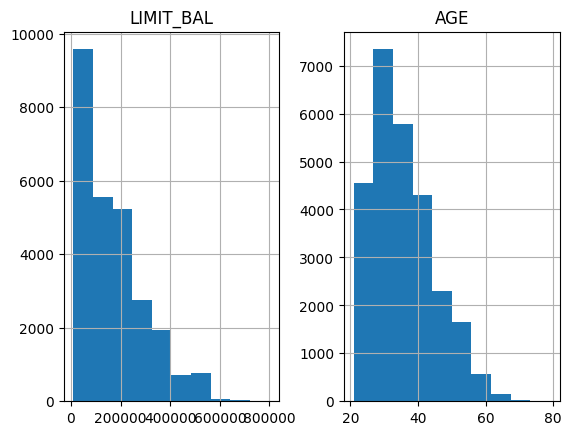

In [34]:
df_clean_2[['LIMIT_BAL','AGE']].hist()

Esse é um bom snapshot visual dessas características. Podemos obter uma rápida visualização aproximada de todos os dados dessa forma. Para vermos sínteses estatísticas, como a média e a mediana (isto é, o quinquagésimo percentil), há outra função útil do pandas.

Gere um relatório tabular de síntese estatística usando o comando a seguir:

In [35]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Com base nos histogramas e nas convenientes estatísticas calculadas por .describe(), que inclui uma contagem de não nulos, a média e o desvio-padrão, o valor mínimo, o valor máximo e os quartis, podemos chegar a algumas conclusões.
LIMIT_BAL, o limite de crédito, parece fazer sentido. Os limites de créditos têm um valor mínimo igual a 10.000. Esse dataset é de Taiwan; a unidade monetária (novos dólares taiwaneses) não é familiar, mas intuitivamente sabemos que o limite de crédito deve ser um valor acima de zero. Recomendamos que você tente converter para a moeda local e considerar esses limites. Por exemplo, 1 dólar americano é igual a cerca de 30 novos dólares taiwaneses.  
A característica AGE também parece ser bem distribuída, com ninguém com idade abaixo de 21 anos possuindo uma conta de crédito.  
Para as características categóricas, é útil verificar as contagens de valores, já que há relativamente poucos valores exclusivos.

Obtenha as contagens de valores da característica EDUCATION usando o código a seguir:

In [36]:
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


Aqui, vemos os graus de instrução não documentados 0, 5 e 6, já que o dicionário de dados descreve apenas “Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros)”. O sócio da empresa nos disse que não conhece os outros graus. Já que eles não são predominantes, vamos agrupá-los na categoria “outros”, que parece apropriada, claro que com o consentimento de nosso cliente.

In [37]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

<ipython-input-37-94422046aee3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)


,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


Observe que fizemos essa alteraçao in loco (inplace=True). Isso significa que, em vez de retornar um novo DataFrame, a operação fará a alteração no DataFrame existente.

Obtenha as contagens de valores da característica MARRIAGE usando o código a seguir:

In [38]:
df_clean_2['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,286
0,48


O problema aqui é semelhante ao encontrado na característica EDUCATION; há um valor, 0, que não está documentado no dicionário de dados: “1 = casado; 2 = solteiro; 3 = outros”.  
Logo, vamos agrupá-lo com “outros”.

Altere os valores 0 da característica MARRIAGE para 3 e examine o resultado com este código:

In [39]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

<ipython-input-39-feaf91dc5dc0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)


,count
MARRIAGE,
2,14158
1,12172
3,334


Fizemos uma extensa exploração de limpeza dos dados. Posteriormente, executaremos operações mais avançadas de visualização e exploração das características de histórico financeiro, que vêm depois disso no DataFrame.

## Implementando a OHE para uma Característica Categórica

Neste exercício, executaremos uma “engenharia reversa” na característica EDUCATION do
dataset para obter os rótulos de texto que representam os diferentes graus de instrução e
mostraremos como usar o pandas para criar uma OHE.

Primeiro, consideraremos nossa característica EDUCATION, antes de ela ser codificada como
um ordinal. Pelo dicionário de dados, sabemos que 1 = pós-graduação (graduate school),2 = universidade (university), 3 = ensino médio (high school), 4 = outros (others). Queremos criar uma coluna que tenha essas strings, em vez de números. Execute as etapas a
seguir para fazer o exercício.

Crie uma coluna vazia para os rótulos categórios chamada EDUCATION_CAT usando o comando a seguir:

In [40]:
df_clean_2['EDUCATION_CAT'] = 'none'

Examine as primeiras linhas do DataFrame referentes às colunas EDUCATION e EDUCATION_CAT usando o comando a seguir:

In [41]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


Precisamos preencher essa nova coluna com as strings apropriadas. O pandas fornece
uma funcionalidade conveniente para o mapeamento de valores de uma série (Series)
para novos valores. Na verdade, essa função chamadas .map e usa um dicionário para
estabelecer a correspondência entre os valores antigos e os novos. Nosso objetivo aqui
é mapear os números de EDUCATION para as strings que eles representam. Por exemplo,
onde a coluna EDUCATION for igual a 1, atribuiremos a string ‘graduate school’ à coluna
EDUCATION_CAT, e assim por diante para os outros graus de instrução.

Crie um dicionário que descreva o mapeamento das categorias de instrução usando o
código a seguir:

In [42]:
cat_mapping = {
1: "graduate school",
2: "university",
3: "high school",
4: "others"
}

Aplique o mapeamento à coluna EDUCATION original usando .map e atribua o resultado à
nova coluna EDUCATION_CAT:

In [43]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


Excelente! Observe que poderíamos ter pulado a Etapa 1, na qual atribuímos a nova coluna com ’none’, e ter ido direto para as Etapas 3 e 4 para criar a nova coluna. No entanto, às vezes é útil criar uma nova coluna inicializada com um único valor, logo, é bom saber como fazê-lo.  
Estamos prontos para a codificação one-hot. Podemos executá-la passando uma série (Series) de uma DataFrame para a função get_dummies() do pandas. A função recebeu esse nome porque as colunas de codificação one-hot também são chamadas de variáveis dummy. O resultado será um novo DataFrame, com um número igual de colunas e níveis da variável categórica.

Execute esse código para criar um DataFrame de codificação one-hot da coluna EDUCATION_CAT.
Examine as 10 primeiras linhas:

In [44]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


Agora podemos ver o motivo dessa abordagem ser chamada de “codificação one-hot”: em
todas as colunas, qualquer linha específica terá um número 1 em exatamente 1 coluna
e zeros nas outras. Em uma linha específica, a coluna com o 1 deve corresponder ao
nível da variável categórica original. Para verificar isso, precisamos concatenar esse novo
DataFrame com o original e examinar os resultados lado a lado. Usaremos a função concat
do pandas, para a qual passaremos a lista de DataFrames que queremos concatenar e a
palavra-chave axis=1 solicitando que eles sejam concatenados horizontalmente, isto é, ao
longo do eixo da coluna. Basicamente, isso significa que estamos combinando esses dois
DataFrames “lado a lado”, o que sabemos que podemos fazer porque acabamos de criar
esse novo DataFrame a partir do original: sabemos que ele terá o mesmo número de linhas,
que estarão na mesma ordem do DataFrame original.

Concatene o DataFrame de codificação one-hot com o original da seguinte forma:


In [45]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school','high school', 'university', "others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,True,False
8,high school,False,True,False,False
9,high school,False,True,False,False


É um bom momento para salvarmos o DataFrame criado aqui, que resume nossos esforços de limpar os dados e adicionar uma coluna OHE.  
Selecione um nome de arquivo e grave o último DataFrame em um arquivo CSV (de
valor separado por vírgula) desta forma: df_with_ohe.to_csv(’cleaned_data.csv’,
index=False); não incluímos o índice, já que isso não é necessário e pode gerar colunas adicionais quando fizermos o carregamento posteriormente.

In [46]:
df_with_ohe.to_csv('cleaned_data.csv', index=False);
df = df_with_ohe

## Explorando as Características Financeiras Restantes do Dataset

Nessa atividade, você examinara as características financeiras restantes de maneira semelhante a como examinamos PAY_1, PAY_2, PAY_3 e assim por diante. Para visualizar melhor alguns desses dados, usaremos uma função matemática que deve ser familiar: o logaritmo. Você usará o pandas com apply, que serve para aplicar qualquer função a uma coluna ou DataFrame inteiro. Ao concluir a atividade, deverá ter o conjunto a seguir de histogramas de transformações de pagamentos diferentes de zero:

Crie listas com nomes para as características financeiras restantes.

In [47]:
bills_feats = [f'BILL_AMT{i}' for i in range(1,7)]

In [48]:
pay_amt_feats = [f'PAY_AMT{i}' for i in range(1,7)]

In [49]:
df_test = df_with_ohe.copy()
df_test[[*bills_feats,*pay_amt_feats]].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Use .describe() para examinar as sínteses estatísticas das características de valor da fatura. Reflita sobre o que viu. Faz sentido?

In [50]:
df_test[bills_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Visualize as características de valor da fatura uma grade 2 por 3 de plotagens de histograma. Dica: Você pode usar 20 bins para essa visualização.

array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

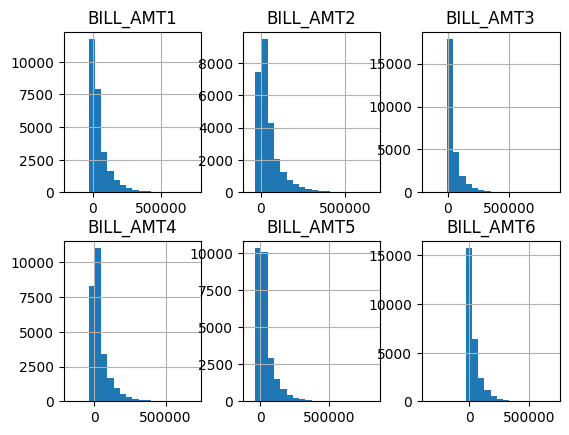

In [51]:
df_test[bills_feats].hist(layout= (2,3),bins=20)

Obtenha o resumo .describe() para as características de valor do pagamento. Faz
sentido?

In [52]:
df_test[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


Plote um histograma das características de pagamento da fatura semelhante ao das características de valor da fatura, mas aplique também alguma rotação aos rótulos do eixo
x com o argumento de palavra-chave xrot para que eles não se sobreponham. Podemos
incluir o argumento da palavra-chave xrot =< ângulo> em qualquer função de plotagem
para girar os rótulos do eixo x de acordo com o ângulo específico em graus. Considere os
resultados.

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

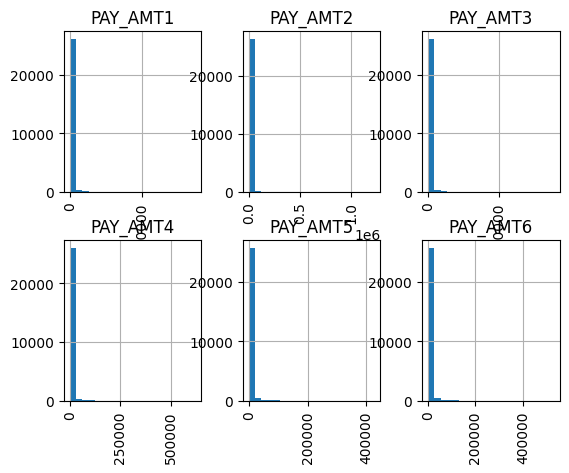

In [53]:
df_test[pay_amt_feats].hist(layout= (2,3),bins=20,xrot = 90)

Use uma máscara booleana para ver quantos dos dados de valor do pagamento são exatamente iguais a 0. O resultado faz sentido dado o histograma da etapa anterior?

In [54]:
valid_mask_inDay = df_test[pay_amt_feats] == 0
valid_mask_inDay

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
29995,False,False,False,False,False,False
29996,False,False,False,False,True,True
29997,True,True,False,False,False,False
29998,False,False,False,False,False,False


Ignorando os pagamentos iguais a 0 usando a máscara que criou na etapa anterior, utilize o método .apply() do pandas e o método np.log10() do NumPy para plotar histo- gramas de trasnformações logarítmicas dos pagamentos diferentes de zero. Considere os resultados.  
Dica: Você pode usar .apply() para aplicar qualquer função, inclusive log10, a todos os elementos de um DataFrame ou de uma coluna usando a sintaxe a seguir: .apply(<nome_função>).

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

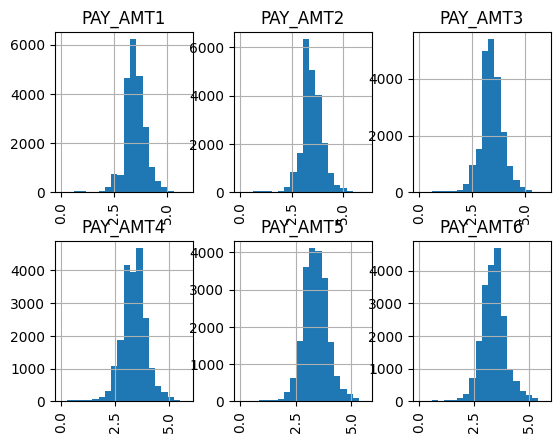

In [55]:
import numpy as np
df_test[pay_amt_feats][~valid_mask_inDay].apply(np.log10).hist(layout= (2,3),bins=20, xrot = 90)

# Introdução ao Scikit-Learn e Avaliação do Modelo

Antes de começar vamos começar colocando dados sintéticos gerados com a numpy

In [56]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0,high=10.0,size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [57]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope *X + np.random.normal(loc=0.0,scale=1.0,size=(1000,)) + intercept
y[0:10]

array([ 1.41690038, -0.06094518, -1.77788582, -1.56713719, -0.01770264,
       -3.32069221,  0.96046229, -1.14730508,  0.06095778, -0.15232854])

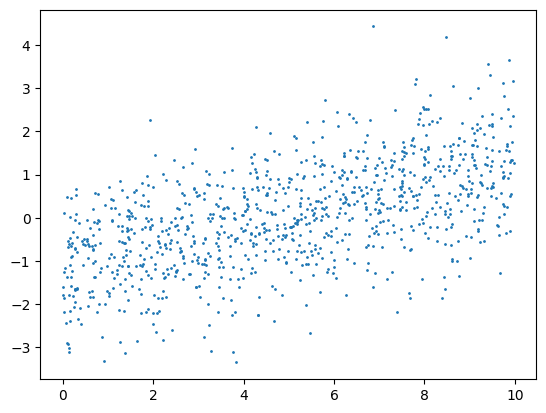

In [58]:
mpl.rcParams['figure.dpi'] = 100
plt.scatter(X,y,s=1)

## Regressão linear com o scikit-learn

Neste exercício, pegaremos os dados sintéticos gerado e determinaremos uma linha de melhor ajuste, ou regressão linear, usando o scikit-learn. A primeira etapa é importar uma classe de modelo de regressão linear do scikit-learn e criar um objeto a partir dela. Como em qualquer classe de modelo, você deve observar todas as opções padrão.  
Repare que, nesse caso, para uma regressão linear, não há tantas opções a serem especificadas: você pode usar os padrões para esse exercício. As configurações padrão incluem fit_intercept=True, significando que o modelo de regressão terá um termo para a interceptação. Isso é, sem dúvida, apropriado, já que adicionamos uma interceptação aos dados sintéticos. Execute as etapas a seguir para o exercício:

Execute este código para importar a classe de modelo de regressão linear e instanciá-la:

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

Agora podemos ajustar o modelo usando os dados sintéticos, lembrando-nos de redimensionar o array de características. Após ajustar o modelo de regressão linear, examinaremos lin_reg.intercept_, que contém a interceptação do modelo ajustado, como era de se esperar, e lin_reg.coef_, que contém a inclinação.

Execute este código para ajustar o modelo e examinar os coeficientes:

In [60]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


Podemos ver novamente que ajustar um modelo no scikit-learn, após os dados estarem preparados e as opções do modelo terem sido definidas, é um processo trivial. Isso ocorre porque o usuário não precisa fazer todo o trabalho algorítmico de determinar os parâmetros do modelo. Discutiremos alguns desses detalhes posteriormente no caso do modelo de regressão logística que usaremos nos dados do estudo de caso.  
E quanto à inclinação e à interceptação de nosso modelo ajustado?  
Esses números estão bem próximos da inclinação e da interceptação que indicamos ao criar o modelo. No entanto, devido ao ruído aleatório, são apenas aproximações.  
Finalmente, podemos usar o modelo para fazer previsões de valores de características.  
Aqui faremos isso empregando os mesmos dados utilizados no ajuste do modelo: o array de características, X. Capturaremos a saída como uma variável chamada y_pred: esse caso é muito parecido com o anterior, só que agora estamos inserindo a saída do método .predict em uma variável.

Execute este código para fazer previsões:

In [61]:
y_pred = lin_reg.predict(X.reshape(-1, 1))

Podemos exibir as previsões, y_pred, da característica X como uma plotagem linear sobre a plotagem dispersa dos dados da característica e da resposta como fizemos anteriormente.  
Aqui, com o acréscimo de plt.plot, que produz uma plotagem linear por padrão, para plotar os valores da característica e da resposta prevista pelo modelo. Observe que após os dados X e y inserimos ’r’ em nossa chamada a plt.plot. Esse argumento de palavrachave dá à linha a cor vermelha e faz parte de uma sintaxe abreviada para a formatação da plotagem.

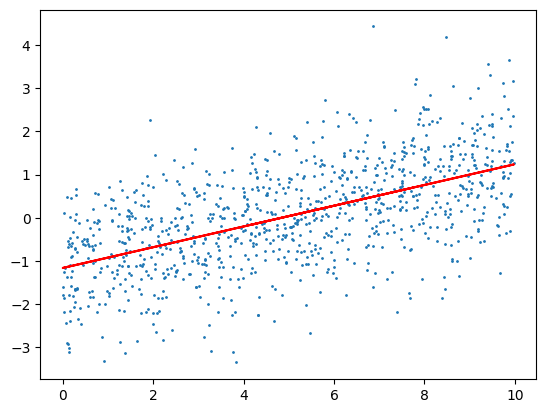

In [62]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')

A plotagem exibe como seria a linha de melhor ajuste para os dados, como esperávamos.  
Nesse exercício, ao contrário de quando chamamos .predict com a regressão logística, fizemos previsões para os mesmos dados X que usamos para treinar o modelo. Essa é uma diferença importante. Enquanto no caso atual estamos vendo como o modelo “ajusta” os mesmos dados com os quais foi treinado, anteriormente examinamos as previsões do modelo para dados novos e desconhecidos. Em aprendizado de máquina, geralmente o que nos interessa são os recursos preditivos: queremos modelos que nos ajudem a saber os
possíveis resultados de futuros cenários. No entanto, no fim das contas as previsões tanto dos dados de treinamento usados para ajustar o modelo, quanto dos dados de teste, que não foram usados no ajuste, são importantes para entendermos o funcionamento do modelo. Formalizaremos essas noções posteriormente.

## Calculando as taxas de verdadeiros e falsos positivos e negativos e a matriz de confusão em Python

Neste exercício, usaremos os dados de teste e as previsões do modelo de regressão logística utilizando apenas a característica EDUCATION. Ilustraremos como calcular manualmente as taxas de verdadeiros e falsos positivos e negativos, assim como os números de verdadeiros e falsos positivos e negativos da matriz de confusão. Em seguida, mostraremos uma maneira rápida de calcular uma matriz de confusão com o scikit-learn. Execute as etapas a seguir para fazer o exercício:

Execute o código abaixo para treinar uma regressão logística utilizando apenas a característica EDUCATION:

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# amostre utilizando holdout
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values,
test_size=0.2, random_state=24)
# crie um objeto para regressao logistica
example_lr = LogisticRegression()
# treine o modelo utilizando os dados proprios para treino
example_lr.fit(X_train, y_train)
# teste o modelo utilizando os dados proprios para teste
y_pred = example_lr.predict(X_test)

Execute este código para calcular o número de amostras positivas:

In [64]:
P = sum(y_test)
P

1155

Agora precisamos do número de verdadeiros positivos. São as amostras em que o rótulo verdadeiro é 1 e a previsão também é 1. Podemos identificá-las com uma máscara lógica para as amostras que forem positivas (y_test == 1) E (& é o operador lógico AND) em Python) tiveram uma previsão positiva (y_pred == 1).

Use este código para calcular o número de verdadeiros positivos:

In [65]:
TP = sum( (y_test == 1) & (y_pred == 1) )
TP

0

A taxa de verdadeiros positivos é a proporção de verdadeiros positivos da classe positiva.

Execute o código a seguir para obter a taxa de verdadeiros positivos:

In [66]:
TPR = TP/P
TPR

0.0

Da mesma forma, podemos identificar os falsos negativos.

Calcule o número de falsos negativos com este código:

In [67]:
FN = sum( (y_test == 1) & (y_pred == 0) )
FN

1155

Também queremos a taxa de falsos negativos.  
Calcule a taxa de falsos negativos com:

In [68]:
FNR = FN/P
FNR

1.0

Primeiro, confirmamos que sua soma é 1. Esse fato é fácil de ver porque a TPR = 0 E FPR = 1. O que isso nos diz sobre nosso modelo? No conjunto de teste, pelo menos para as amostras positivas, na verdade o modelo agiu como um modelo nulo de classe majoritária. Todas as amostras positivas foram previstas como negativas, logo, nenhuma delas foi prevista corretamente.

Calcularemos a TNR e a FPR de nossos dados de teste. Já que esses cálculos são muito semelhantes aos que examinamos anteriormente, vamos exibir de uma só vez e demonstraremos uma nova função Python:  
O que aprendemos aqui? Na verdade, nosso modelo se comporta exatamente com o modelo nulo de classe majoritária para todas as amostras, tanto positivas quanto negativas. É claro que precisaremos de um modelo melhor.  
Embora tenhamos calculado manualmente todas as entradas da matriz de confusão nesse exercício, no scikit-learn há uma maneira rápida de fazer isso. Observe que, no scikit- learn, a classe verdadeira fica ao longo do eixo vertical e a classe prevista fica ao longo do eixo horizontal da matriz de confusão, como apresentamos anteriormente.

In [69]:
N = sum(y_test == 0)
N

4178

In [70]:
TN = sum((y_test == 0) & (y_pred == 0))
TN

4178

In [71]:
FP = sum((y_test == 0) & (y_pred == 1))
FP

0

In [72]:
TNR = TN/N
FPR = FP/N
print(f'A taxa de verdadeiro negativo {TNR}. A taxa de falso positivo {FPR}')

A taxa de verdadeiro negativo 1.0. A taxa de falso positivo 0.0


Crie uma matriz de confusão no scikit-learn com este código:

In [73]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

Todas as informações necessárias para o cálculo da TPR, FNR, TNR e FPR estão contidas na matriz de confusão. Repare também que há várias outras métricas de classificação que podem ser derivadas da matriz de confusão. Na verdade, algumas delas são sinônimos das que já examinamos aqui. Por exemplo, a TPR também é chamada de recall e sensibilidade. Outra métrica que é com frequência usada para a classificação binária é a precisão: trata-se da proporção de previsões positivas que estão corretas (em vez da proporção de amostras positivas que foram previstas corretamente). Ganharemos mais experiência no uso da precisão nas próximas atividades.

## Obtendo probabilidades previstas a partir de um modelo de regressão logística

No exercício a seguir, nos familiarizaremos com as probabilidades previstas da regressão
logística e veremos como obtê-las a partir de um modelo do scikit-learn.
Podemos começar a descobrir probabilidades previstas examinando melhor os métodos disponíveis para nós no objeto de modelo de regressão logística que treinamos. Lembre-se de que antes, uma vez treinado o modelo, podíamos fazer previsões binária usando os valores das características de novas amostras, passando esses valores para o método .predict do modelo treinado. Essas são previsões feitas para a suposição de um limite igual a 0.5.  
No entanto, podemos acessar diretamente as probabilidades previstas dessas amostras, usando o método .predict_proba. Execute as etapas a seguir para fazer o exercício.

Obtenha as probabilidades previstas para as amostras de teste usando este código:

In [74]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77460186, 0.22539814],
       [0.77460186, 0.22539814],
       [0.79040462, 0.20959538],
       ...,
       [0.79040462, 0.20959538],
       [0.79040462, 0.20959538],
       [0.79040462, 0.20959538]])

Podemos ver na saída desse código, armazenada em y_pred_proba, que há duas colunas.  
Isso ocorre porque há duas classes em nosso problema de classificação: negativa e positiva.  
Supondo que os rótulos negativos sejam codificados como 0 e os positivos como 1, como o são em nossos dados, o scikit-learn considerará a probabilidade de associação de classe negativa como a primeira coluna e a de associação de classe positiva como a segunda coluna.  
Pela nossa discussão das probabilidades, podemos deduzir que a soma das probabilidades das duas classes é igual a 1 para cada amostra. Confirmaremos isso.  
Primeiro, podemos usar np.sum na primeira dimensão (colunas) para calcular a soma das probabilidades de cada amostra.  

Calcule a soma das probabilidades previstas para cada amostra com este código:

In [75]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

Certamente parece que temos apenas 1s! Devemos verificar se o resultado tem a mesma
forma do array de rótulos de dados de teste.

Verifique a forma do array com este código:

In [76]:
prob_sum.shape

(5333,)

Ótimo; essa é a forma esperada. Agora verificaremos se todos os valores são iguais a 1. Usaremos np.unique para exibir os elementos exclusivos do array. Esse método é semelhante à palavra-chave DISTINCT do SQL. Se todas as somas de probabilidades forem realmente iguais a 1, deve haver apenas 1 elemento exclusivo no array de probabilidades:

Exiba todos os elementos exclusivos do array com este código:

In [77]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22539814, 0.22539814, 0.20959538, ..., 0.20959538, 0.20959538,
       0.20959538])

Qual seria a aparência dessas probabilidades? Uma maneira de descobrir, e um bom
diagnóstico para a saída do modelo, é plotar as probabilidades previstas. Um histograma seria uma maneira natural de fazermos isso. Podemos usar diretamente a função de histogramas do matplotlib, hist(), para criá-lo. Observe que, se você executar uma célula que tenha apenas a função de histograma, a saída da função do NumPy será retornada antes da plotagem. Isso inclui o número de amostras de cada bin e os locais de bordas dos bins.

Execute este código para ver a saída da função de histograma e uma plotagem não formatada (não mostrada):

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20959538, 0.21458312, 0.21957087, 0.22455861, 0.22954636,
        0.23453411, 0.23952185, 0.2445096 , 0.24949734, 0.25448509,
        0.25947283]),
 <BarContainer object of 10 artists>)

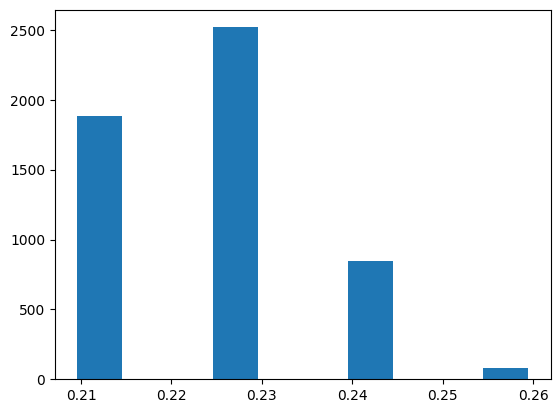

In [78]:
plt.hist(pos_proba)

Essas informações podem ser úteis e também poderiam ser obtidas diretamente a partir da função np.histogram(). No entanto, aqui estamos mais interessados na plotagem, logo, ajustaremos o tamanho da fonte e adicionaremos alguns rótulos de eixos.

Execute este código para ver a plotagem formatada do histograma das probabilidades
previstas:

Text(0, 0.5, 'Number of samples')

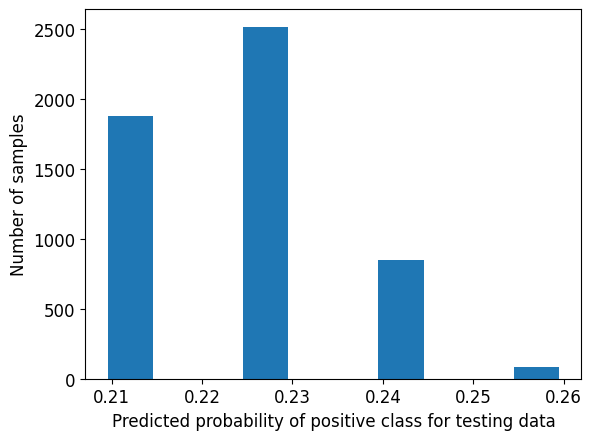

In [79]:
mpl.rcParams["font.size"] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

Observe que há apenas quatro bins com amostras no histograma de probabilidades e
eles estão bem distantes uns dos outros. Isso ocorre porque há somente quatro valores exclusivos para a característica EDUCATION, que é a única característica de nosso exemplo de modelo.    
Observe também que todas as probabilidades previstas estão abaixo de 0.5. É por isso que cada amostra foi prevista como negativa, pelo uso do limite 0.5.   Podemos deduzir que, se definíssemos nosso limite abaixo de 0.5, obteríamos resultados diferentes. Por exemplo, se definíssemos o limite como 0.25, todas as amostras do bin menor da extrema direita da Figura 1 seriam classificados como positivas, já que a probabilidade prevista para todas elas estaria acima de 0.25. Seria informativo para nós se pudéssemos visualizar quantas dessas amostras tinham realmente rótulos positivos. Em seguida, poderíamos ver
se mover nosso limite para baixo de 0.25 melhoraria o desempenho de nosso classificador pela classificação das amostras do bin da extrema direita como positivas.  
Na verdade, podemos visualizar isso facilmente, usando um histograma empilhado.
Ele será muito parecido com o histograma da Figura 1, exceto pelo fato de as amostras negativas e positivas terem cores diferentes. Em primeiro lugar, precisamos distinguir as amostras positivas das negativas nas probabilidades previstas. Podemos fazer isso indexando nosso array de probabilidades previstas com máscaras lógicas; primeiro obteremos as amostras positivas, em que y_test == 1 e, em seguida, obteremos as negativas, em que y_test == 0.

Isole as probabilidades previstas das amostras positivas e negativas com esse código:

In [80]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

Agora queremos plotar essas probabilidades como um histograma empilhado. O código é semelhante ao do histograma que criamos anteriormente, exceto por passarmos uma lista dos arrays a serem plotados, que são os arrays de probabilidades de amostas positivas e negativas que acabamos de criar, e uma palavra-chave indicando que queremos que as barras sejam empilhadas em vez de plotadas lado a lado. Também criaremos uma legenda para que as cores sejam claramente identificáveis na plotagem.

Plote um histograma empilhado com o código a seguir:

Text(0, 0.5, 'Number of samples')

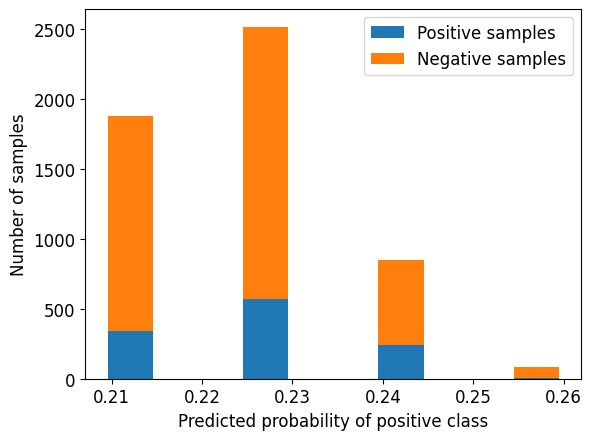

In [81]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

A plotagem mostra o rótulo verdadeiro das amostras para cada probabilidade prevista.  
Agora podemos considerar qual seria o efeito de baixarmos o limite para 0.25. Pare um pouco para pensar no que significaria, lembrando-se de que qualquer amostra com probabilidade prevista igual ou acima do limite seria classificada como positiva.  
Já que quase todas as amostras do bin menor da direita na Figura 1 são negativas, se diminuíssemos o limite para 0.25, elas seriam classificadas erroneamente como amostras positivas e aumentaríamos nossa taxa de falsos positivos. Ao mesmo tempo, ainda não teríamos conseguido classificar muitas amostras positivas corretamente, caso conseguíssemos classificar alguma, logo, a taxa de verdadeiros positivos aumentaria demais. Parece que fazer essa alteração diminuiu a acurácia do modelo.

## Executando a regressão logística com uma nova característica e criando uma curva precision-recall

Nesta atividade, você treinará uma regressão logística usando uma característica diferente
de EDUCATION. Em seguida, avaliará graficamente o tradeoff entre precisão e recall, assim
como calculará a área sob uma curva precision-recall. Você também calculará a ROC AUC
nos conjuntos tanto de treinamento quanto de teste e os comparará.

Execute as etapas a seguir para concluir a atividade:

Use o método train_test_split do scikit-learn para criar um novo conjunto de dados de treinamento e de teste. Dessa vez, em vez de EDUCATION, use LIMIT_BAL o limite de crédito da conta.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# amostre utilizando holdout
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1, 1), df['default payment next month'].values,
test_size=0.2, random_state=24)


Treine um modelo de regressão logística usando os dados de treinamento provenientes da
divisão.

In [83]:
# crie um objeto para regressao logistica
lin_reg = LogisticRegression()
# treine o modelo utilizando os dados proprios para treino
lin_reg.fit(X_train, y_train)


LogisticRegression()

Crie o array de probabilidades previstas para os dados de teste.

In [84]:
# teste o modelo utilizando os dados proprios para teste
y_pred = lin_reg.predict_proba(X_test)
y_pred

array([[0.78106157, 0.21893843],
       [0.71327837, 0.28672163],
       [0.80265248, 0.19734752],
       ...,
       [0.71327837, 0.28672163],
       [0.81776452, 0.18223548],
       [0.74558933, 0.25441067]])

Calcule o ROC AUC usando as probabilidades previstas e os rótulos verdadeiros nos dados de teste. Compare o resultado com o ROC AUC da característica EDUCATION.

In [85]:
prob_sum = np.sum(y_pred)
teste = metrics.roc_auc_score(y_test,y_pred[:,1])
teste

0.6201990844642832

Plote a curva ROC.

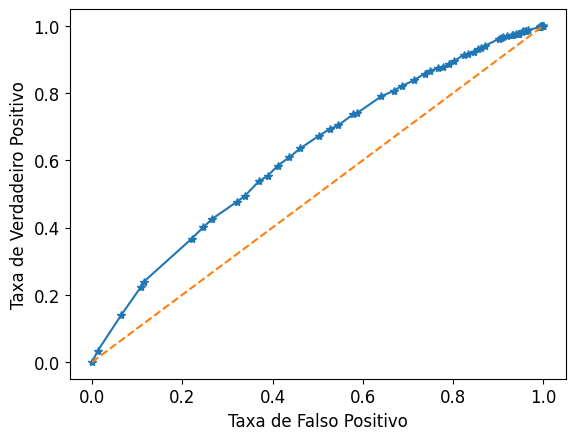

In [86]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred[:,1])
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'--')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

Calcule os dados da curva precision-recall baseando-se nos dados de teste e usando a
funcionalidade do sciki-learn.

In [87]:
# prompt: Calcule os dados da curva precision-recall baseando-se nos dados de teste e usando a
# funcionalidade do sciki-learn.
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred[:, 1])
precision, recall

(array([0.21657604, 0.21661665, 0.21651032, 0.21663225, 0.21667293,
        0.21671362, 0.21687653, 0.21695807, 0.21712135, 0.21724398,
        0.21728488, 0.2173258 , 0.21715363, 0.21719457, 0.21704695,
        0.21716981, 0.21725179, 0.22033243, 0.22073643, 0.22129396,
        0.22189753, 0.22198318, 0.22200354, 0.22244133, 0.22283792,
        0.22392516, 0.22441652, 0.22553363, 0.22670997, 0.22714286,
        0.22761729, 0.22985832, 0.2305063 , 0.23116659, 0.231755  ,
        0.23327465, 0.23466667, 0.23569638, 0.23654424, 0.23784926,
        0.23956357, 0.24237288, 0.24342913, 0.24518744, 0.24855794,
        0.25020134, 0.25417595, 0.25845411, 0.26031164, 0.26293661,
        0.26655574, 0.27004512, 0.27573253, 0.27804107, 0.28183716,
        0.28231142, 0.28683603, 0.28744327, 0.29115934, 0.30654206,
        0.31032172, 0.31477357, 0.36617843, 0.36338028, 0.37470726,
        0.42857143, 1.        ]),
 array([1.        , 1.        , 0.9991342 , 0.9991342 , 0.9991342 ,
        0.9991

Plote a curva precision-recall usando o matplotlib.

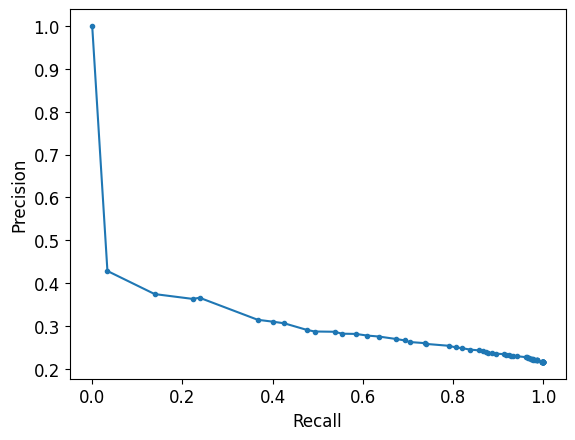

In [88]:
# Plote a curva precision-recall.
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Use o scikit-learn para calcular a área sob a curva precision-recall.

In [89]:
pr_auc = metrics.average_precision_score(y_test, y_pred[:, 1])
pr_auc

0.29824891448211244

Agora recalcule a ROC AUC, mas, dessa vez, faça-o para os dados de treinamento. Em que esse cálculo é diferente, conceitual e quantitativamente, do que fizemos antes?

In [90]:
# Recalcule o ROC AUC para os dados de treinamento
y_pred_train = lin_reg.predict_proba(X_train)
roc_auc_train = metrics.roc_auc_score(y_train, y_pred_train[:, 1])

print(f"ROC AUC para os dados de treinamento: {roc_auc_train}")

ROC AUC para os dados de treinamento: 0.6182918113358344


# Detalhes da Regressão Logística e Exploração de Características

## Teste F e seleção de características univariada

Neste exercício, usaremos o teste F para examinar a relação entre as características e a resposta. Investigaremos esse método como parte do que é chamado de seleção de características univariada: a prática de testar as características uma a uma em relação à variável resposta para ver quais têm poder preditivo. Execute as etapas a seguir para fazer o exercício:

A primeira etapa para a execução do teste F ANOVA é separar as características e a resposta como arrays NumPy usando a lista que criamos e a indexação de inteiros do pandas:

In [92]:
# crie uma lista com o nome de todas as colunas
features_response = df.columns.tolist()
# crie uma lista com o nome das colunas que nao serao utilizadas
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
'EDUCATION_CAT', 'graduate school', 'high school', 'none',
'others', 'university']

# filtre da lista com todas as colunas, as colunas indesejadas (list comprehension)
features_response = [item for item in features_response if item not in items_to_remove]
X = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:, -1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


Há 17 características, e os arrays tanto de características quanto da resposta têm o mesmo número de amostras como esperado.

Importe a função f_classif e forneça as características e a resposta:

In [93]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

Duas saídas são obtidas de f_classif: a estatística F e o valor-p, para comparação de cada característica com a variável resposta. Criaremos um novo DataFrame contendo os nomes das características e essas saídas para facilitar nossa inspeção. Uma maneira de especificar um novo DataFrame é usando um dicionário, com pares chave:valor de nomes de colunas e dos dados que ficarão contidos em cada uma delas. Mostraremos o DataFrame classificado (de forma ascendente) pelo valor-p.

Use este código para criar um DataFrame com nomes de características, com a estatística F e com os valores-p e exiba-o classificado pelo valor-p:

In [94]:
f_test_df = pd.DataFrame({'Feature': features_response[:-1],
'F statistic': f_stat,
'p value': f_p_value})

f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


Observe que, para cada diminuição do valor-p, há um aumento na estatística F, logo,
as informações dessas colunas são basicamente as mesmas em termos de classificação de
características.

As conclusões a que podemos chegar pelo DataFrame da estatística F e dos valores-p são
semelhantes ao que observamos na plotagem de correlação: PAY_1 e LIMIT_BAL parecem
ser as características mais úteis. Elas têm valores-p menores, o que indica que os valores
da média dessas características entre a classe positiva e negativa são significativamente
diferentes, e ajudarão a prever a que classe uma amostra pertence.

No scikit-learn, um dos usos para avaliações como o teste F é na execução da seleção
de características univariada. Isso pode ser benéfico se você tiver um número muito
grande de características, várias talvez totalmente inúteis, e quiser uma maneira rápida
de obter uma “listas curta” com as mais úteis. Por exemplo, se quiséssemos recuperar
apenas 20% das características com maior estatística F, poderíamos fazer isso facilmente
com a classe SelectPercentile. É bom ressaltar que há uma classe semelhante para a
seleção das “k” principais características (em que k é qualquer número que especificarmos),
chamada SelectKBest. Aqui demonstraremos como selecionar as 20% melhores.

Para selecionar as características consideradas pelo teste F como as 20% melhores, primeiro importe a classe SelectPercentile:

In [95]:
from sklearn.feature_selection import SelectPercentile

Instancie um objeto dessa classe, indicando que queremos usar o mesmo critério de seleção
de características, o teste F ANOVA, que consideramos até agora neste exercício, e que, entre
as características, queremos as 20% melhores.

In [96]:
selector = SelectPercentile(f_classif, percentile=20)

Use o método .fit para ajustar o objeto às características e aos dados da resposta, semelhante a como um modelo seria ajustado:

In [97]:
selector.fit(X, y)

SelectPercentile(percentile=20)

Há várias maneiras de acessar as características selecionadas diretamente, o que você
pode aprender na documentação do scikit-learn (examinando o método .transform, ou o
emprego de .fit_transform na etapa do ajuste). No entanto, esses métodos retornarão
arrays NumPy, que não informam os nomes das características que foram selecionadas,
somente os valores. Para resolver isso, você pode usar o método .get_support do objeto
seletor de características, que lhe informará os índices de colunas selecionados no array de
características.

Capture os índices das características selecionadas em um array chamado best_feature_ix:

In [98]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

A saída deve ser igual à mostrada a seguir, indicando um índice lógico que pode ser usado
com um array de nomes de características, assim como valores, supondo que estejam na
mesma ordem do array de características fornecido para SelectPercentile:

Os nomes das características podem ser obtidos com o uso de todos os elementos exceto o
último (nome da variável de resposta) de nossa lista features_response pela indexação
com :-1:

In [99]:
features = features_response[:-1]

Use o array de índices que criamos no item 7 com uma lista comprehension e a lista features para encontrar os nomes das características selecionadas, como descrito a seguir:

In [100]:
best_features = [features[counter] for counter in range(len(features))

if best_feature_ix[counter]]

best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

Nesse código, a lista comprehension percorreu os elementos do array features(len(features)) com o incremento do loop counter, usando o array booleano best_feature_ix, que representa as características selecionadas, na instrução if para verificar cada característica e capturar os nomes das escolhidas.

As características selecionadas equivalem às quatro primeiras linhas do DataFrame de resultados do teste F, logo, a seleção funcionou como esperado. Embora não seja necessário agir das duas maneiras, já que ambas levam ao mesmo resultado, é bom fazê-o para avaliar o trabalho, considerando-se que você está aprendendo novos conceitos. É preciso estar alerta ao fato de que, com métodos de conveniência como SelectPercentile, você não visualizará a estatística F ou os valores-p. No entanto, em algumas situações importantes pode ser melhor usá-los porque os valores-p podem não ser importantes a não ser na classificação de características.

## Visualizando o relacionamento entre as características e a resposta

Neste exercício, você aumentará seu conhecimento sobre as funções de plotagem do Matplotlib. Aprenderemos como personalizar os gráficos para responder melhor a perguntas específicas usando os dados. Ao fazer essas análises, criaremos visualizações significativas de como as características PAY_1 e LIMIT_BAL estão relacionadas com a variável de resposta, o que pode dar suporte às hipóteses que formulamos sobre elas. Isso será feito pela aquisição de um conhecimento maior de API Matploblib. Execute as etapas a seguir para fazer o exercício:

Calcule a linha de base da variável de resposta para a taxa de inadimplência de todo o dataset usando o método .mean() do pandas:

In [101]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

Qual seria uma boa maneira de visualizar as taxas de inadimplência para di-
ferentes valores de características PAY_1?

Lembre-se de que verificamos que essa característica é híbrida, sendo tanto categórica quanto numérica. Vamos plotá-la de uma forma que é típica de características categóricas, devido ao número relativamente pequeno de valores exclusivos. Anteriormente, fizemos contagens de valores dessa característica como parte da exploração de dados e depois co nhecemos groupby/mean quando examinamos a característica EDUCATION. groupby/mean seria uma boa maneira de visualizarmos a taxa de inadimplência para diferentes status de pagamento.

Use este código para criar uma agregação groupby/mean:

In [103]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month' : np.mean})
group_by_pay_mean_y

<ipython-input-103-034f9fa12dfb>:1: FutureWarning: The provided callable <function mean at 0x7e1654330280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month' : np.mean})


,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


Com a verificação desses valores já podemos discernir a tendência. Passaremos direto à sua plotagem. Vamos executá-la por etapas e introduziremos alguns conceitos novos.  
Você deve inserir todo o código dos itens 3 a 6 na mesma célula.  
No Matplotlib, cada plotagem aparece em um objeto axes e dentro de uma janela figure.  
Criando objetos para axes e figures, você pode acessar e alterar diretamente suas propriedades, inclusive os rótulos dos eixos, as tick marks, e outros elementos dos eixos, ou as dimensões da figura.

Crie um objeto axes em uma variável também chamada axes usando o código a seguir:

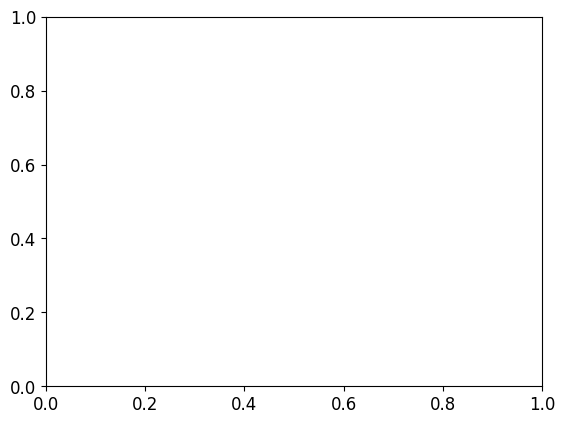

In [107]:
axes = plt.axes()

Plote a taxa de inadimplência geral como uma linha horizontal vermelha.

In [108]:
axes.axhline(overall_default_rate, color='red')

Agora, sobre essa linha, queremos plotar a taxa de inadimplência dentro de cada grupo de valores de PAY_1.

Use o método plot do DataFrame de dados agrupados que criamos. Especifique um
marcador ‘x’ ao longo da plotagem da linha e a inexistência de uma instância de legend,
que criaremos posteriormente; informe que o eixo pai da plotagem deve ser o objeto axes
com o qual estamos trabalhando (caso contrário, o pandas removerá o objeto existente e
criará um novo objeto axes):

In [110]:
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)

<Axes: xlabel='PAY_1'>

Defina o rótulo do eixo y e cria uma instância de legend (há muitas opções para controlarmos a aparência da legenda, mas uma maneira simples é fornecer uma lista de strings indicando os rótulos dos elementos gráficos na ordem em que foram adicionados a axes):

In [111]:
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

A execução de todo o código dos itens anteriores em uma única célula deve resultar a plotagem a seguir:

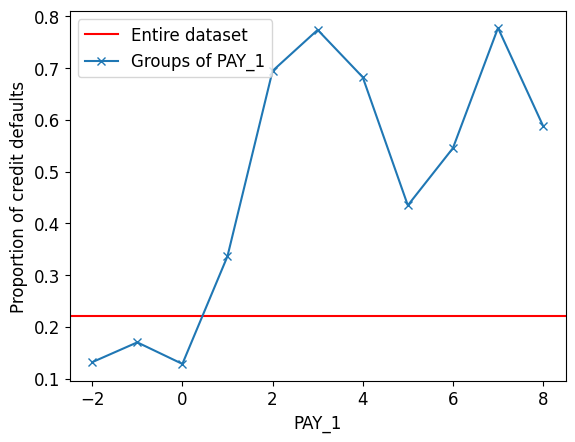

In [112]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

Nossa visualização dos status de pagamento revelou uma história clara e provavelmente
esperada: quem já inadimpliu apresenta uma maior tendência de fazê-lo novamente. A
taxa de inadimplência de contas em boa situação está bem abaixo da taxa geral, que
sabemos que era de aproximadamente 22%. No entanto, pelo menos 30% das contas que
estavam inadimplentes no último mês estarão novamente no próximo mês de acordo com
a verificação. Essa é uma boa referência visual para compartilharmos com o sócio da
empresa já que mostra o efeito da característica que talvez seja a mais importante de
nosso modelo.

Agora voltaremos nossa atenção para a característica classificada como tendo a segunda
associação mais forte com a variável alvo: LIMIT_BAL. Trata-se de uma característica
numérica com muitos valores exclusivos. Uma boa maneira de visualizar características
como essa, para um problema de classificação, é plotar vários histogramas no mesmo eixo,
com diferentes cores para classes distintas. Como maneira de separar as classes, podemos
indexá-las a partir do DataFrame usando arrays lógicos.

Use este código para criar máscaras lógicas para amostras positivas e negativas:

In [113]:
pos_mask = y == 1
neg_mask = y == 0

Para criar nossa plotagem de histograma dupla, geraremos outro objeto axes e chamare mos o método .hist nele duas vezes para os histogramas das classes positiva e negativa. Forneceremos alguns argumentos de palavra-chave adicionais: alpha cria transparência nos histogramas, para que, se eles se sobrepuserem, ainda possamos vê-los, e especificaremos as cores. As cores azul e vermelha, com transparência, exibirão uma cor roxa em locais em que os histogramas se sobrepuserem. Uma vez que tivermos os histogramas, giraremos os tick labels do eixo x para torná-los mais legíveis e criaremos outras anotações que devem ser autoexplicativas.

Use o código a seguir para criar a plotagem de histograma dupla com as propriedades já
mencionadas:

Text(0.5, 1.0, 'Credit limits by response variable')

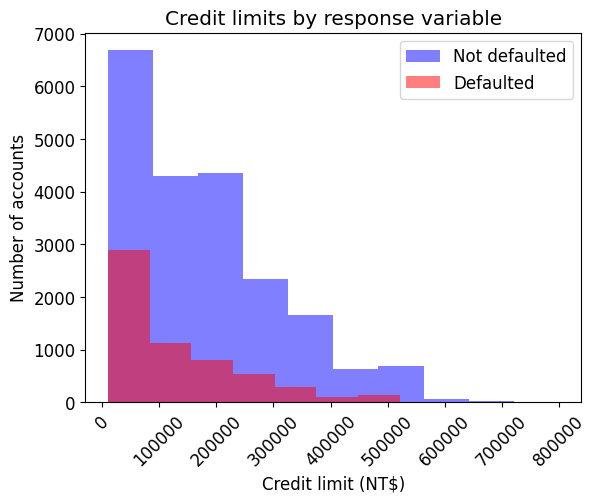

In [114]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

Embora essa plotagem tenha ficado com a formação desejada, ela não é tão explicativa como poderia. Queríamos olhar para ela e constatar que o limite de crédito pode ser uma boa maneira de diferenciar as contas inadimplentes das que não inadimplirão. No entanto, nossa principal percepcão visual é a de que o histograma azul é maior que o vermelho. Isso ocorre porque há menos contas inadimplentes. Já sabíamos desse fato pela verificação das frações das classes.

Seria mais informativo exibir algo sobre como as formas desses histogramas são diferentes, e não apenas seus tamanhos. Para enfatizar esse ponto, podemos tornar igual a área plotada total dos dois histogramas, normalizando-os. O matplotlib fornece um argumento de palavra-chave que facilita a criação do que poderíamos considerar a versão empírica de uma função de densidade de probabilidade. Isso significa que a integral, ou a área contida dentro de cada histograma, será igual a 1 após a normalização, já que as probabilidades resultam em 1.

<span>
Após alguns testes, decidimos criar um histograma com 16 bins. Já que o limite máximo de crédito é NT\$800,000, usamos range com um incremento de NT\$50000.
</span>

Crie bordas dos bins do histograma com esse código, que também exibirá a borda de bin final com uma verificação:

In [115]:
bin_edges = list(range(0,850000, 50000))
print(bin_edges[-1])

800000


O código de plotagem dos histogramas normalizados é semelhante ao anterior, com algumas alterações importantes: o uso da palavra-chave bins para definir a localização das bordas dos bins, density=True para normalizar os histogramas, e alterações nas anotações da plotagem. A parte mais complexa é termos de ajustar os tick labels de y para que as alturas dos bins do histograma tenham a interpretação das proporções, que é mais intuitiva que a saída padrão.

Os tick labels de y são os rótulos de texto exibidos perto dos ticks do eixo y e costumam ser simplesmente os valores dos ticks nesses locais. No entanto, você pode alterar isso manualmente se quiser.

Execute este código para produzir histogramas normalizados:

<ipython-input-118-310622877a3a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

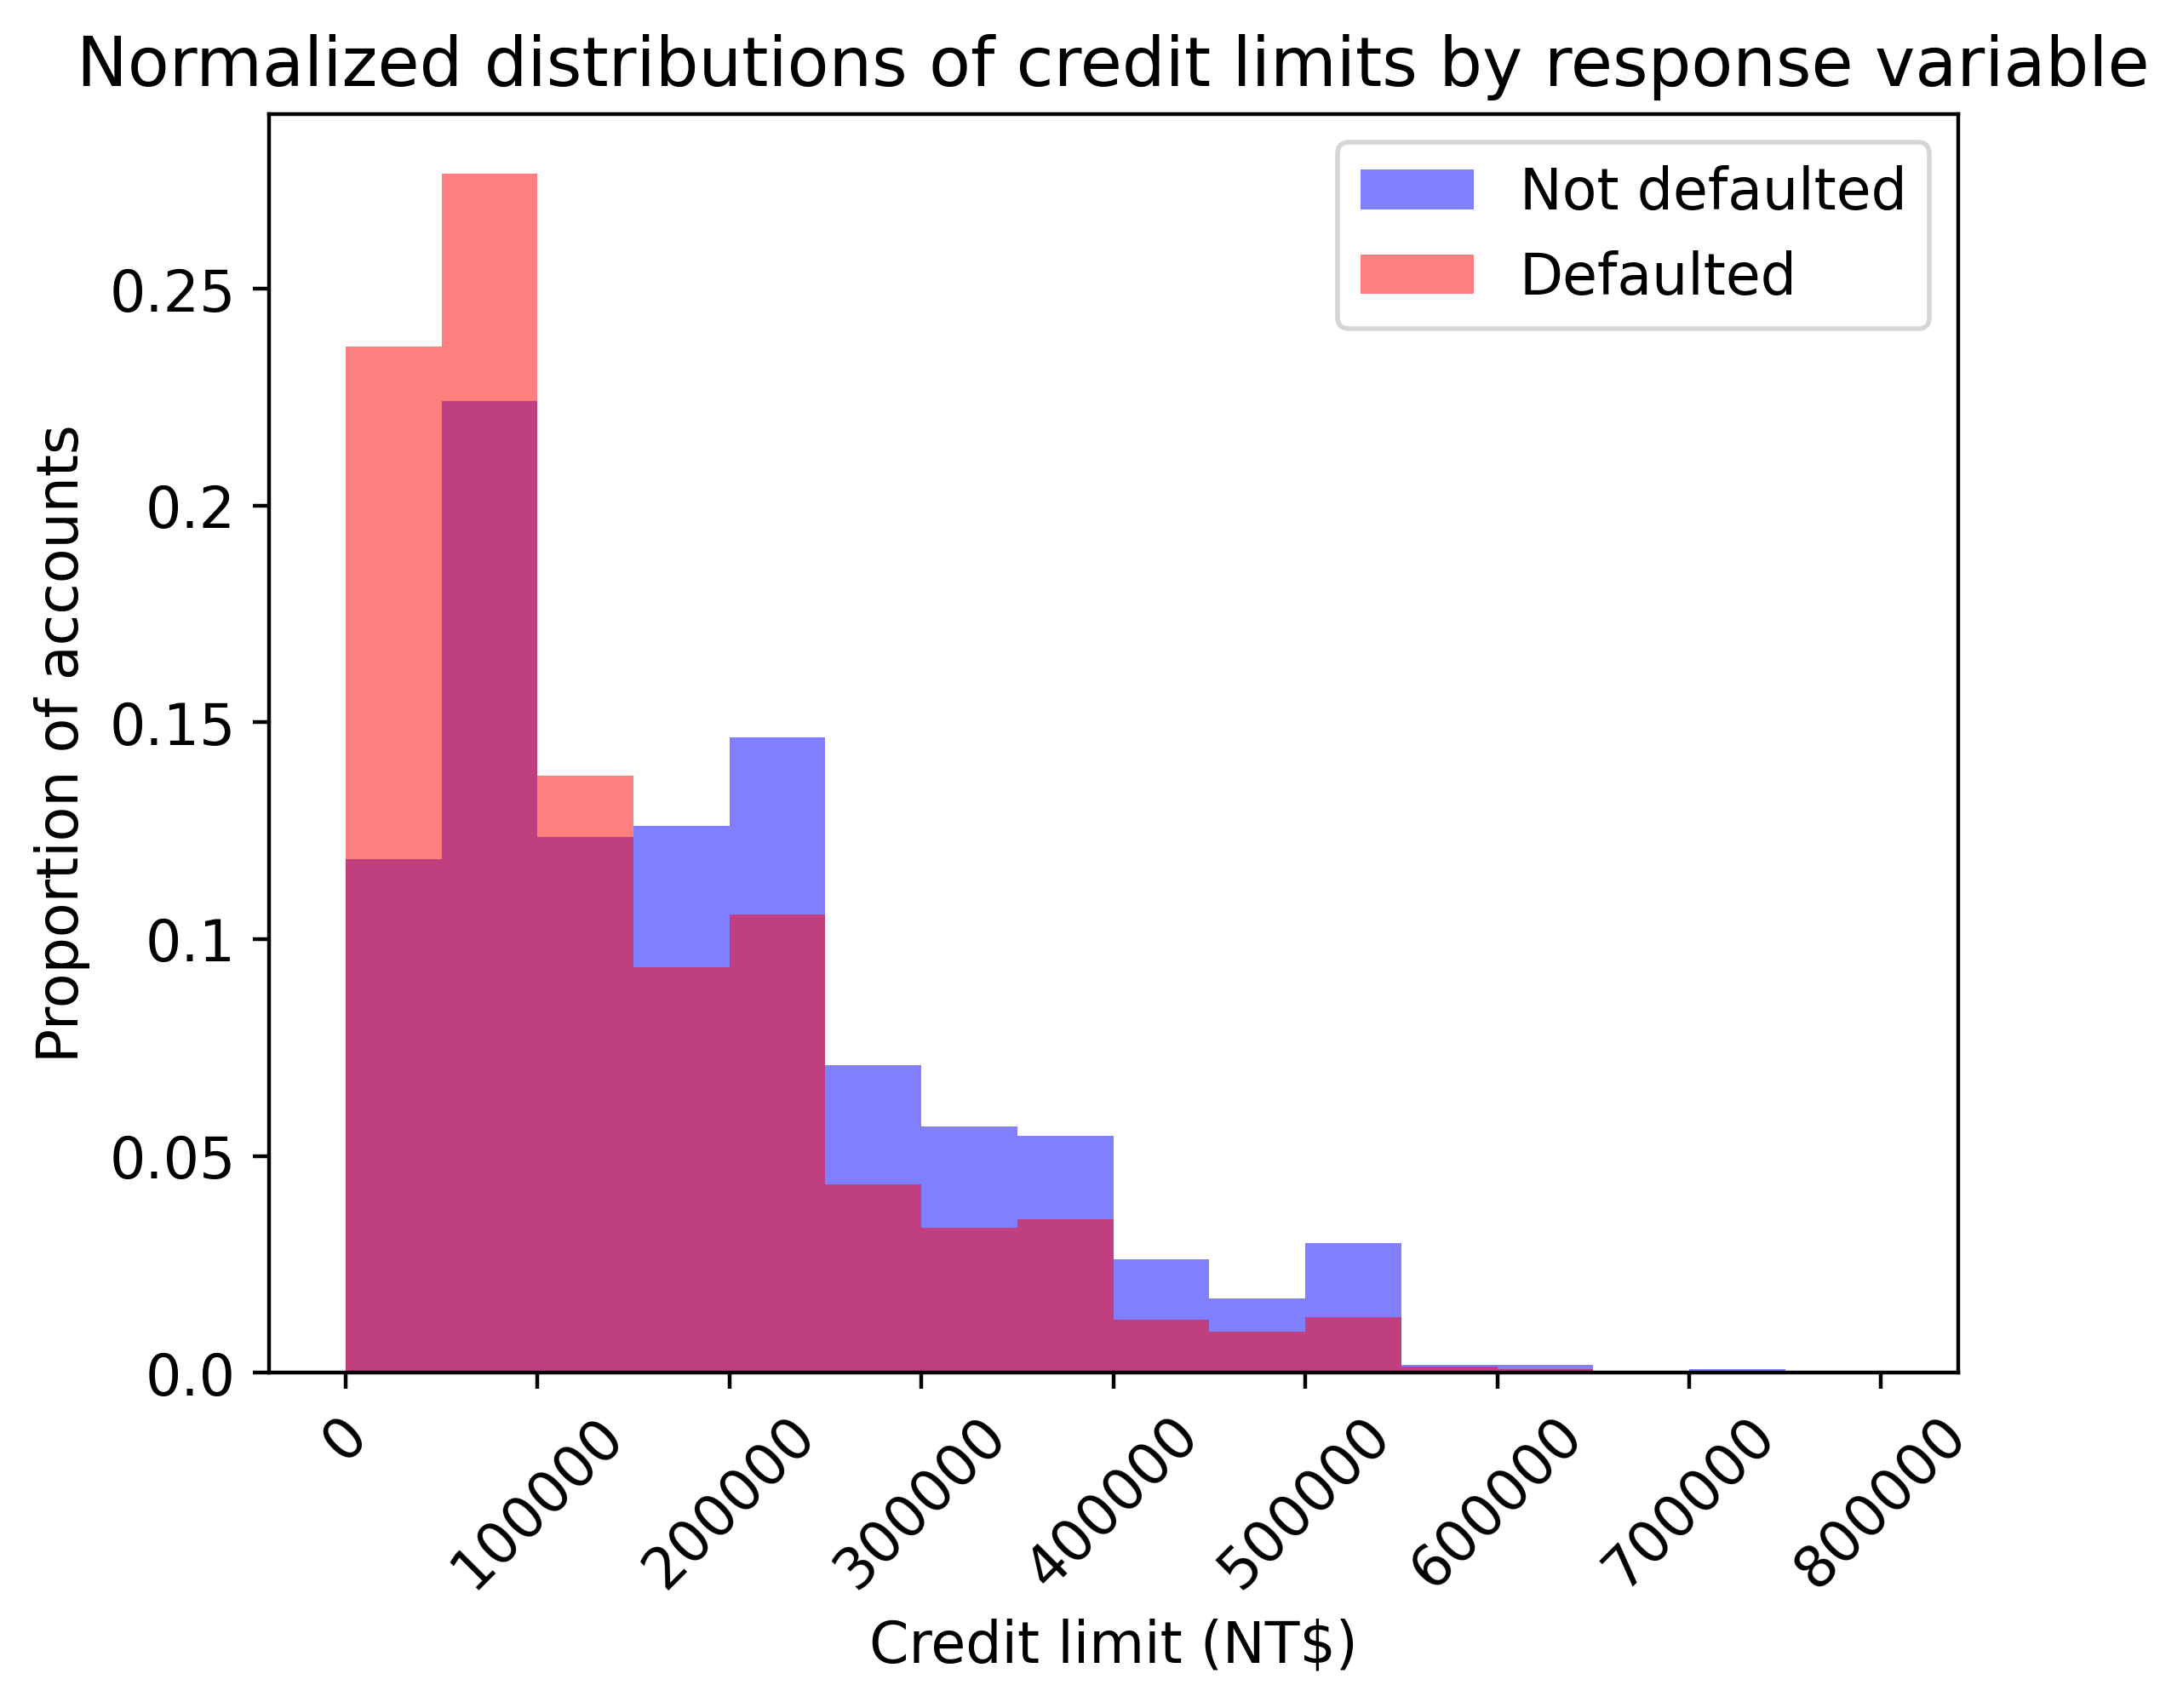

In [118]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha = 0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha = 0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

Podemos ver que as plotagens do Matplotlib são altamente personalizáveis. Para visualizar todos os diferentes itens que você pode obter (get) de definir (set) nos eixos do Matplotlib, pesquise aqui: https://matplotlib.org/api/axes_api.html.

O que podemos extrair dessa plotagem? Parece que as contas inadimplentes tendem a
ter uma proporção maior de limites de créditos menores. Contas com limites de créditos
menores do que NT$150,000 estão relativamente mais propensas a inadimplir, enquanto
o oposto é verdadeiro para contas com limites maiores do que esse. Devemos considerar
se isso faz sentido. Nossa hipótese era de que o cliente daria limites menores a contas
que apresentasse mais risco. Essa intuição é compatível com as proporções maiores de
inadimplentes com limites de crédito menores uqe observamos aqui.

Dependendo de como ocorrer a construção do modelo, se as características examinadas
neste exercício se mostrarem importantes para a modelagem preditiva como esperado,
seria bom exibir esses gráficos para nosso cliente, como parte de uma apresentação do
trabalho. Isso daria ao cliente uma ideia de como o modelo funciona.

Algo essencial que aprendemos nesta seção é que leva tempo para produzir apresentações
visuais eficazes. É bom reservar algum tempo no fluxo de trabalho de seu projeto para
isso. Apresentações visuais convincentes valem o esforço, já que comunicam descobertas
importantes de maneira rápida e eficiente para o cliente. Geralmente elas são uma opção
melhor do que adicionar muito texto aos materiais criados. A comunicação visual de
conceitos quantitativos é uma habilidade-chave da ciência de dados.

## Plotando a função sigmóide

Neste exercício, usaremos as variáveis X_exp e Y_exp, criadas anteriormente, para gerar
uma plotagem da função exponencial no intervalo [-4, 4]. Você precisará de todo o
código a seguir para ter essas variáveis disponíveis no exercício. Em seguida, definiremos
uma função para a sigmóide, criaremos uma plotagem dela e consideraremos qual sua
relação com a função exponencial. Execute as etapas a seguir para fazer o exercício:

Use este código para plotar a função exponencial:

Text(0.5, 1.0, 'Plot of $e^X$')

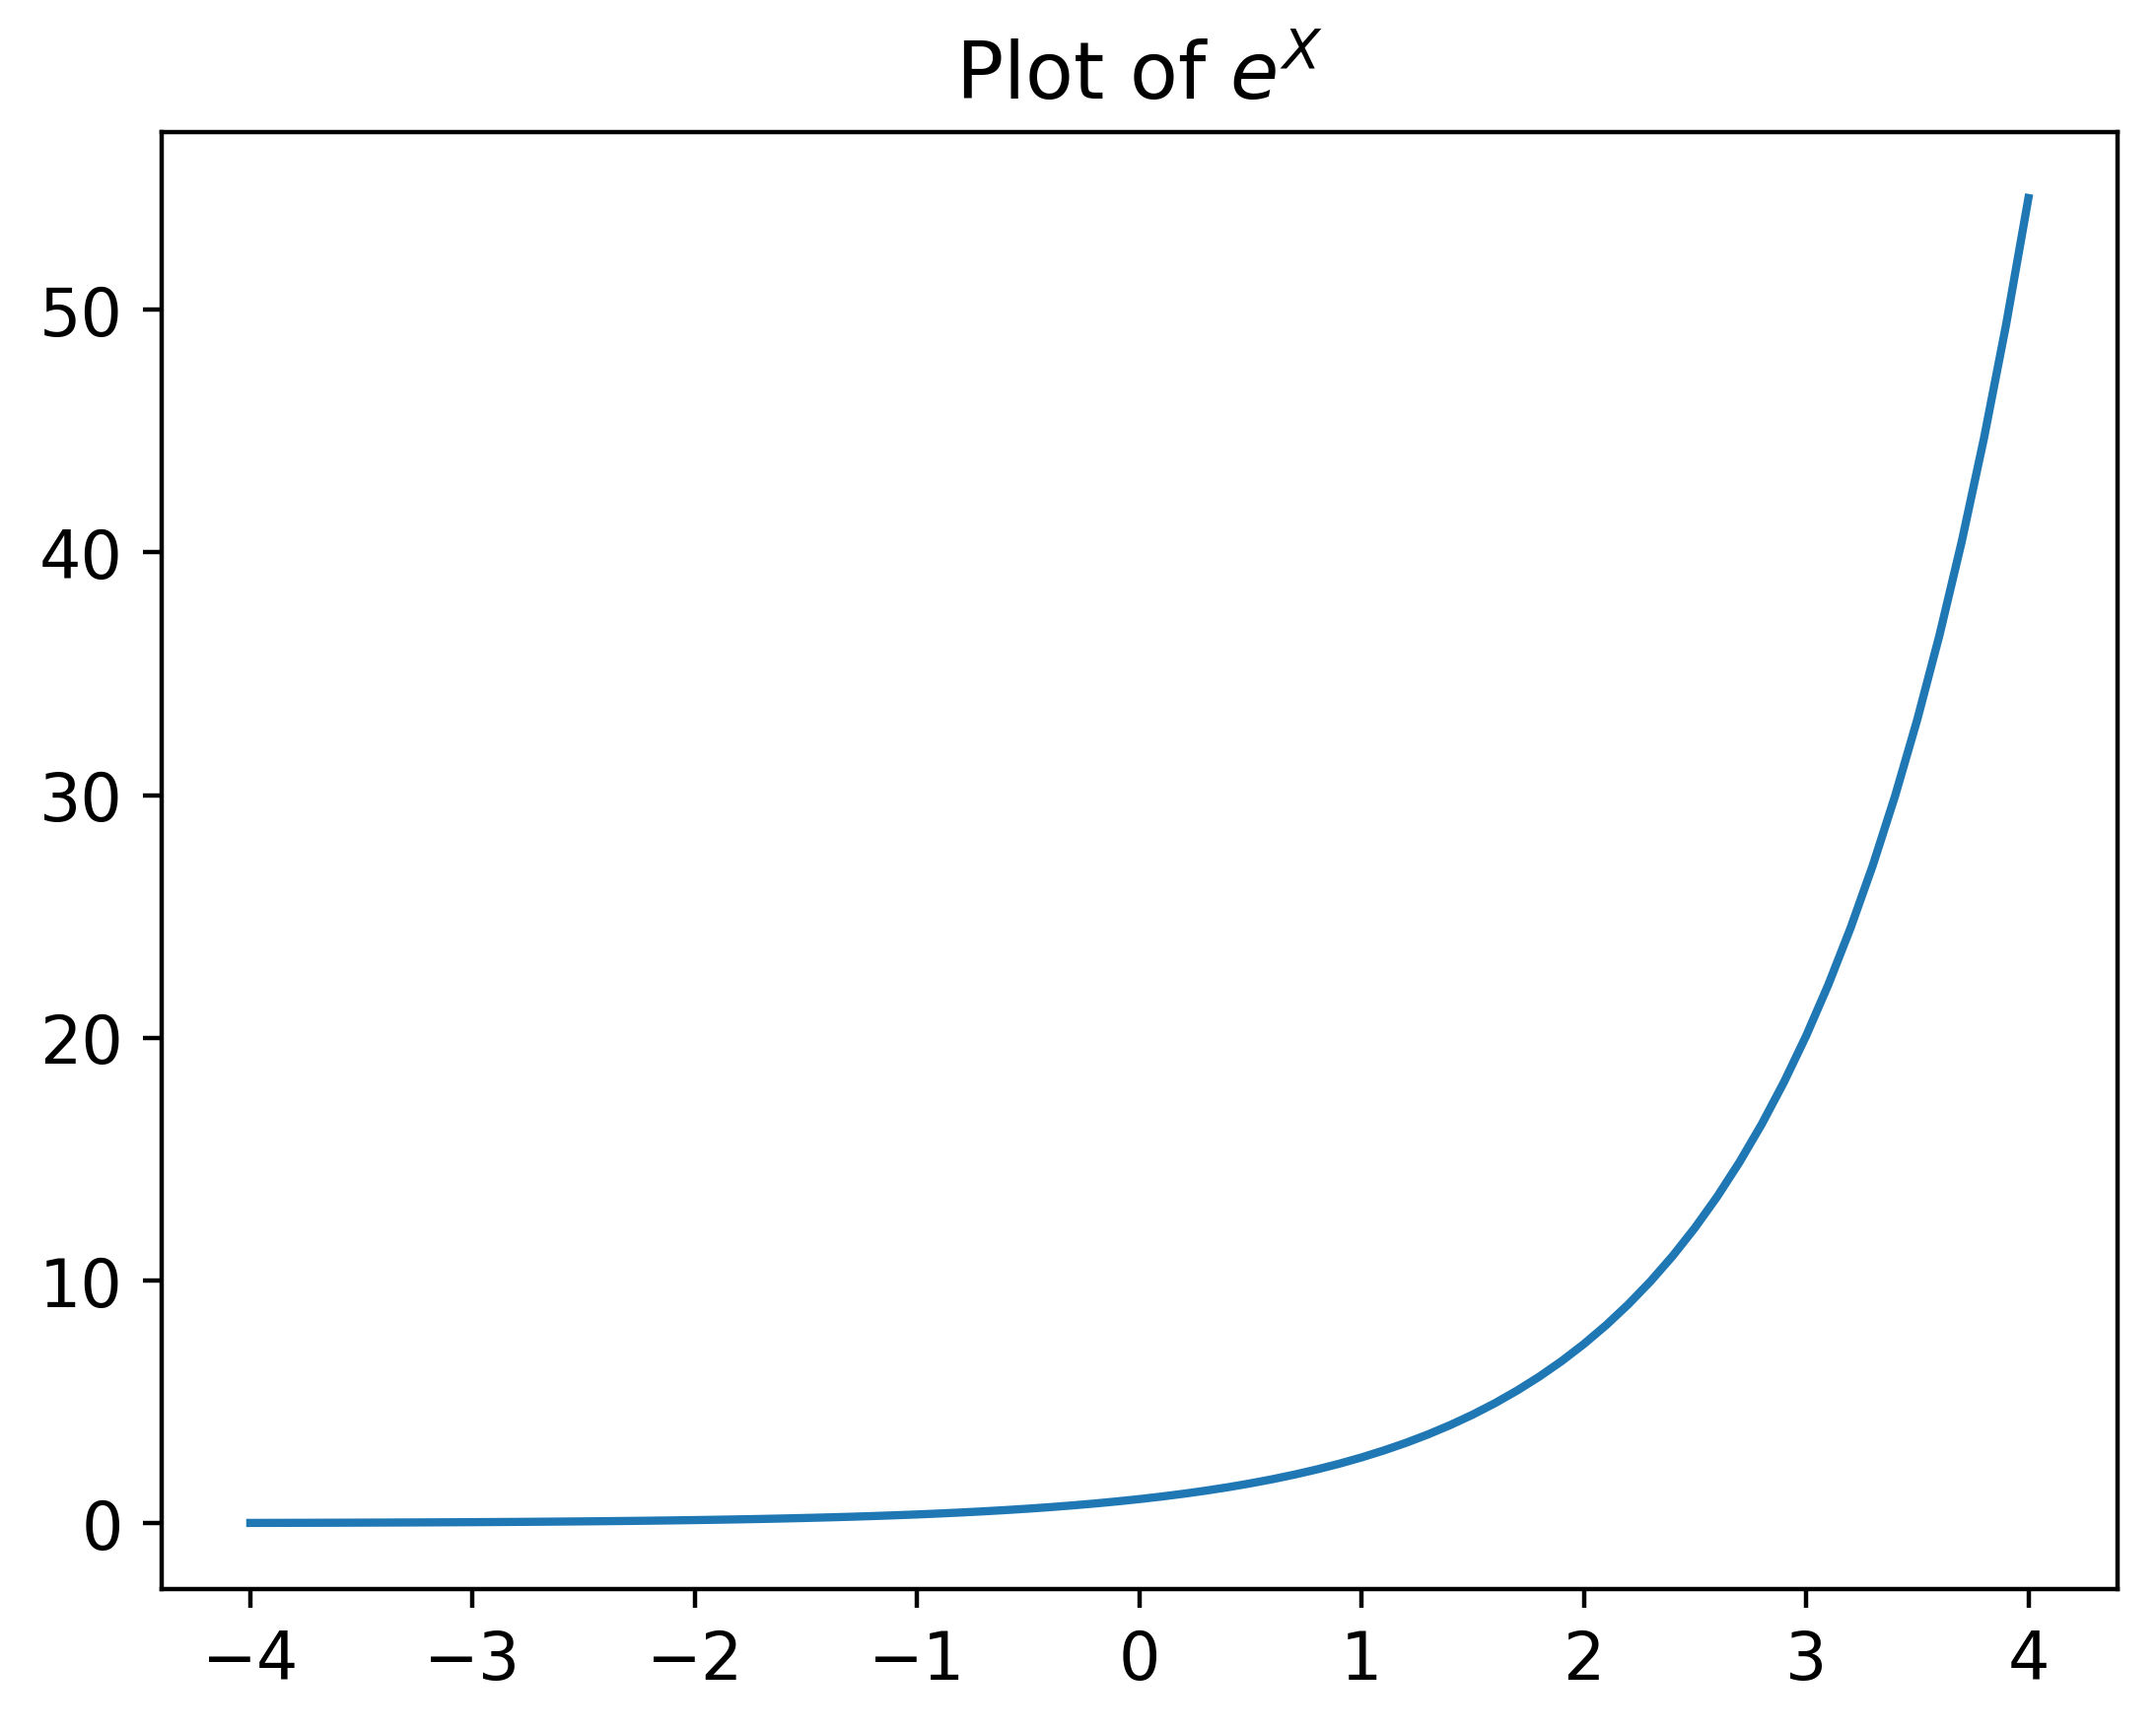

In [120]:
X_exp = np.linspace(-4, 4, 81)
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Observe que, ao nomear a plotagem, nos beneficiamos de um tipo de sintaxe chamado LATEX, que permite formatar notação matemática. Não entraremos em detalhes sobre o LATEX aqui, é suficiente dizer que ele é muito flexível. Repare que inserir parte da string do título entre cifrões faz com que ela seja renderizada com o uso do LATEX, e que o sobrescrito pode ser criado com o uso de ˆ.

Observe também que na Figura 1 que muitos pontos com pouco espaço entre eles geram uma curva de aparência suave, mas na verdade é um gráfico de pontos distintos conectados por segmentos de linha.

O que podemos aprender com a função exponencial?  
Ela nunca é negativa: à medida que X se aproxima do infinito negativo, Y se aproxima
de 0.

À medida que X aumenta, no início Y aumenta lentamente, mas com muita rapidez
“explode”. É a isso que as pessoas se referem quando usam a expressão “crescimento
exponencial” para indicar um aumento rápido.

O que podemos dizer da função sigmóide em relação à função exponencial?
A função sigmóide envolve $e^{−X}$ e não $e^{X}$ . O gráfico de $e^{−X}$ é apenas o reflexo de $e^{X}$  sobre o eixo y. Ele pode ser plotado facilmente, com o uso de chaves para gerarmos caracteres em sobrescrito no título da plotagem.

Execute este código para ver a plotagem de $e^X$:

Text(0.5, 1.0, 'Plot of $e^{-X}$')

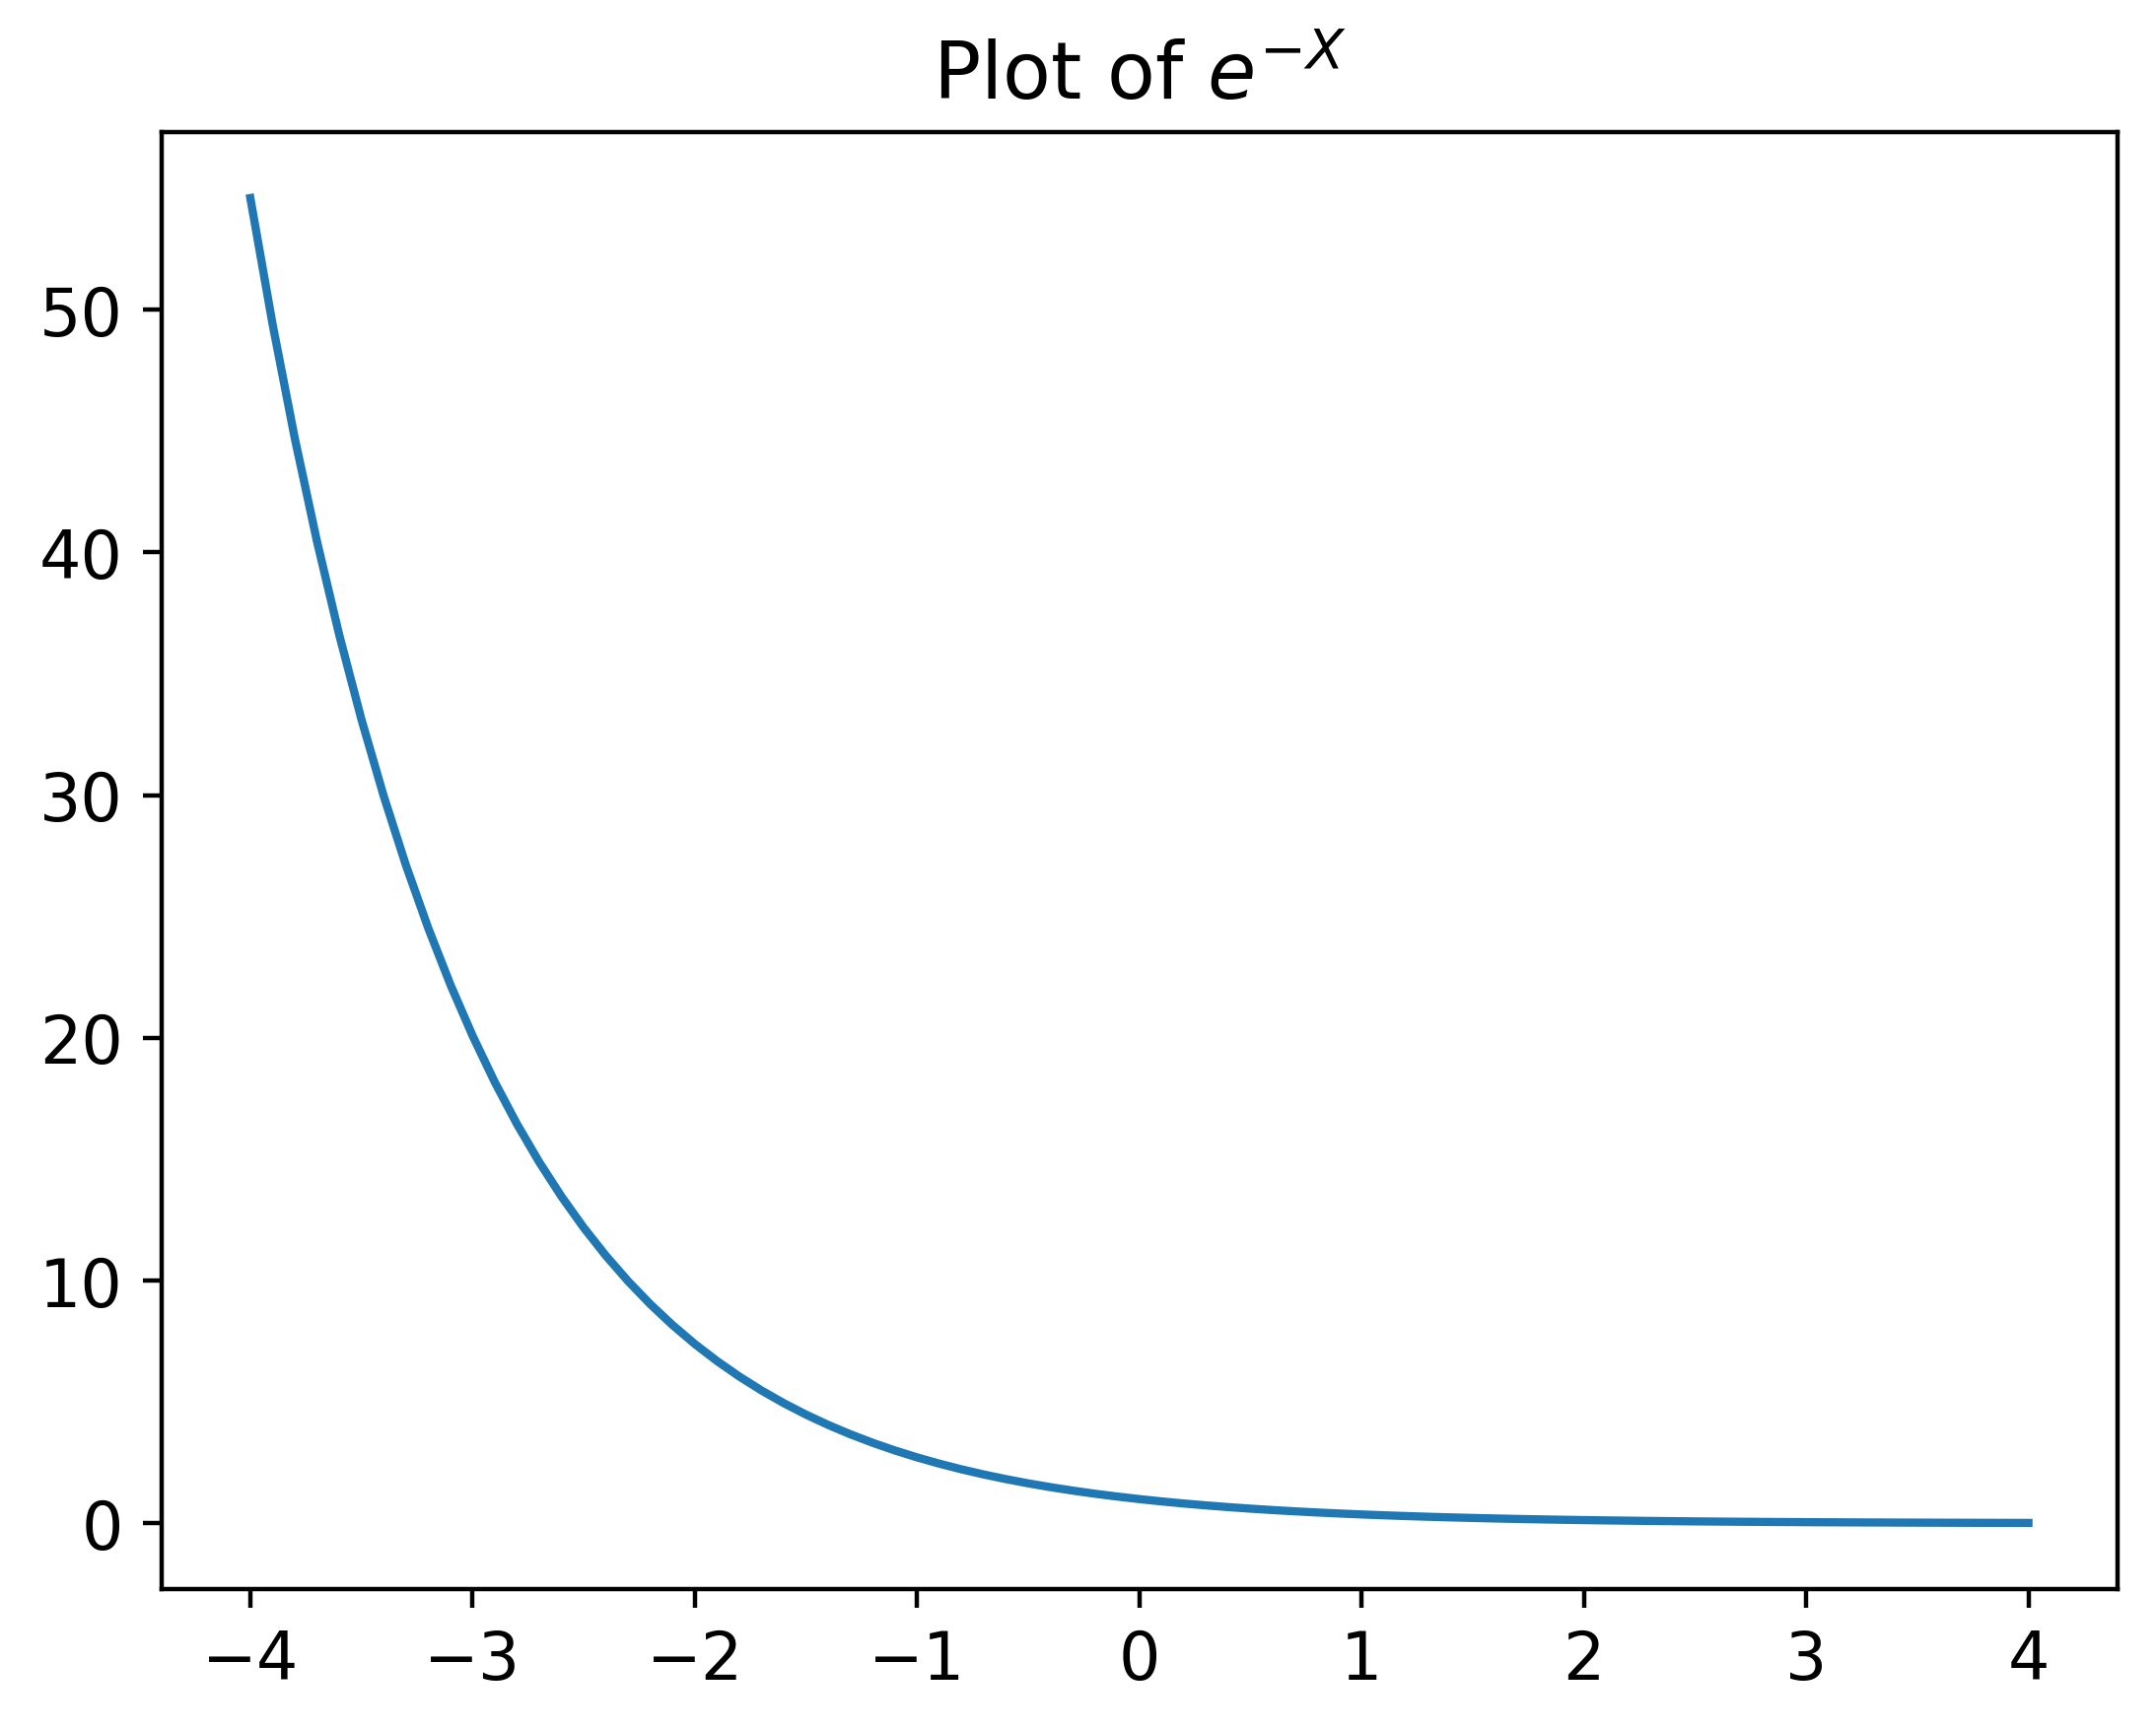

In [122]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

Na função sigmóide, $e^{−X}$ fica no denominador, com 1 sendo adicionado. O numerador é 1. Então, o que ocorre na função à medida que X se aproxima do infinito negativo?   
Sabemos que $e^{−X}$ “aumenta exponencialmente”, tornando-o muito alto. O X aumenta em direção ao infinito positivo? Podemos ver que $e^{−X}$ chega muito perto de 0. Portanto, nesse caso, a função sigmóide seria aproximadamente 1/1 = 1. Isso nos dá a impressão de que a função fica entre 0 e 1. Implementaremos uma função sigmóide em Python e a usaremos para criar uma plotagem e ver se a realidade coincide com essa impressão.

Defina uma função sigmóide como esta:

In [123]:
def sigmoid(X):
  Y = 1 / (1 + np.exp(-X))
  return Y

Crie um intervalo maior de valores de x para usar a plotagem e represente a função sigmóide. Use este código:

Text(0.5, 1.0, 'The sigmoid function')

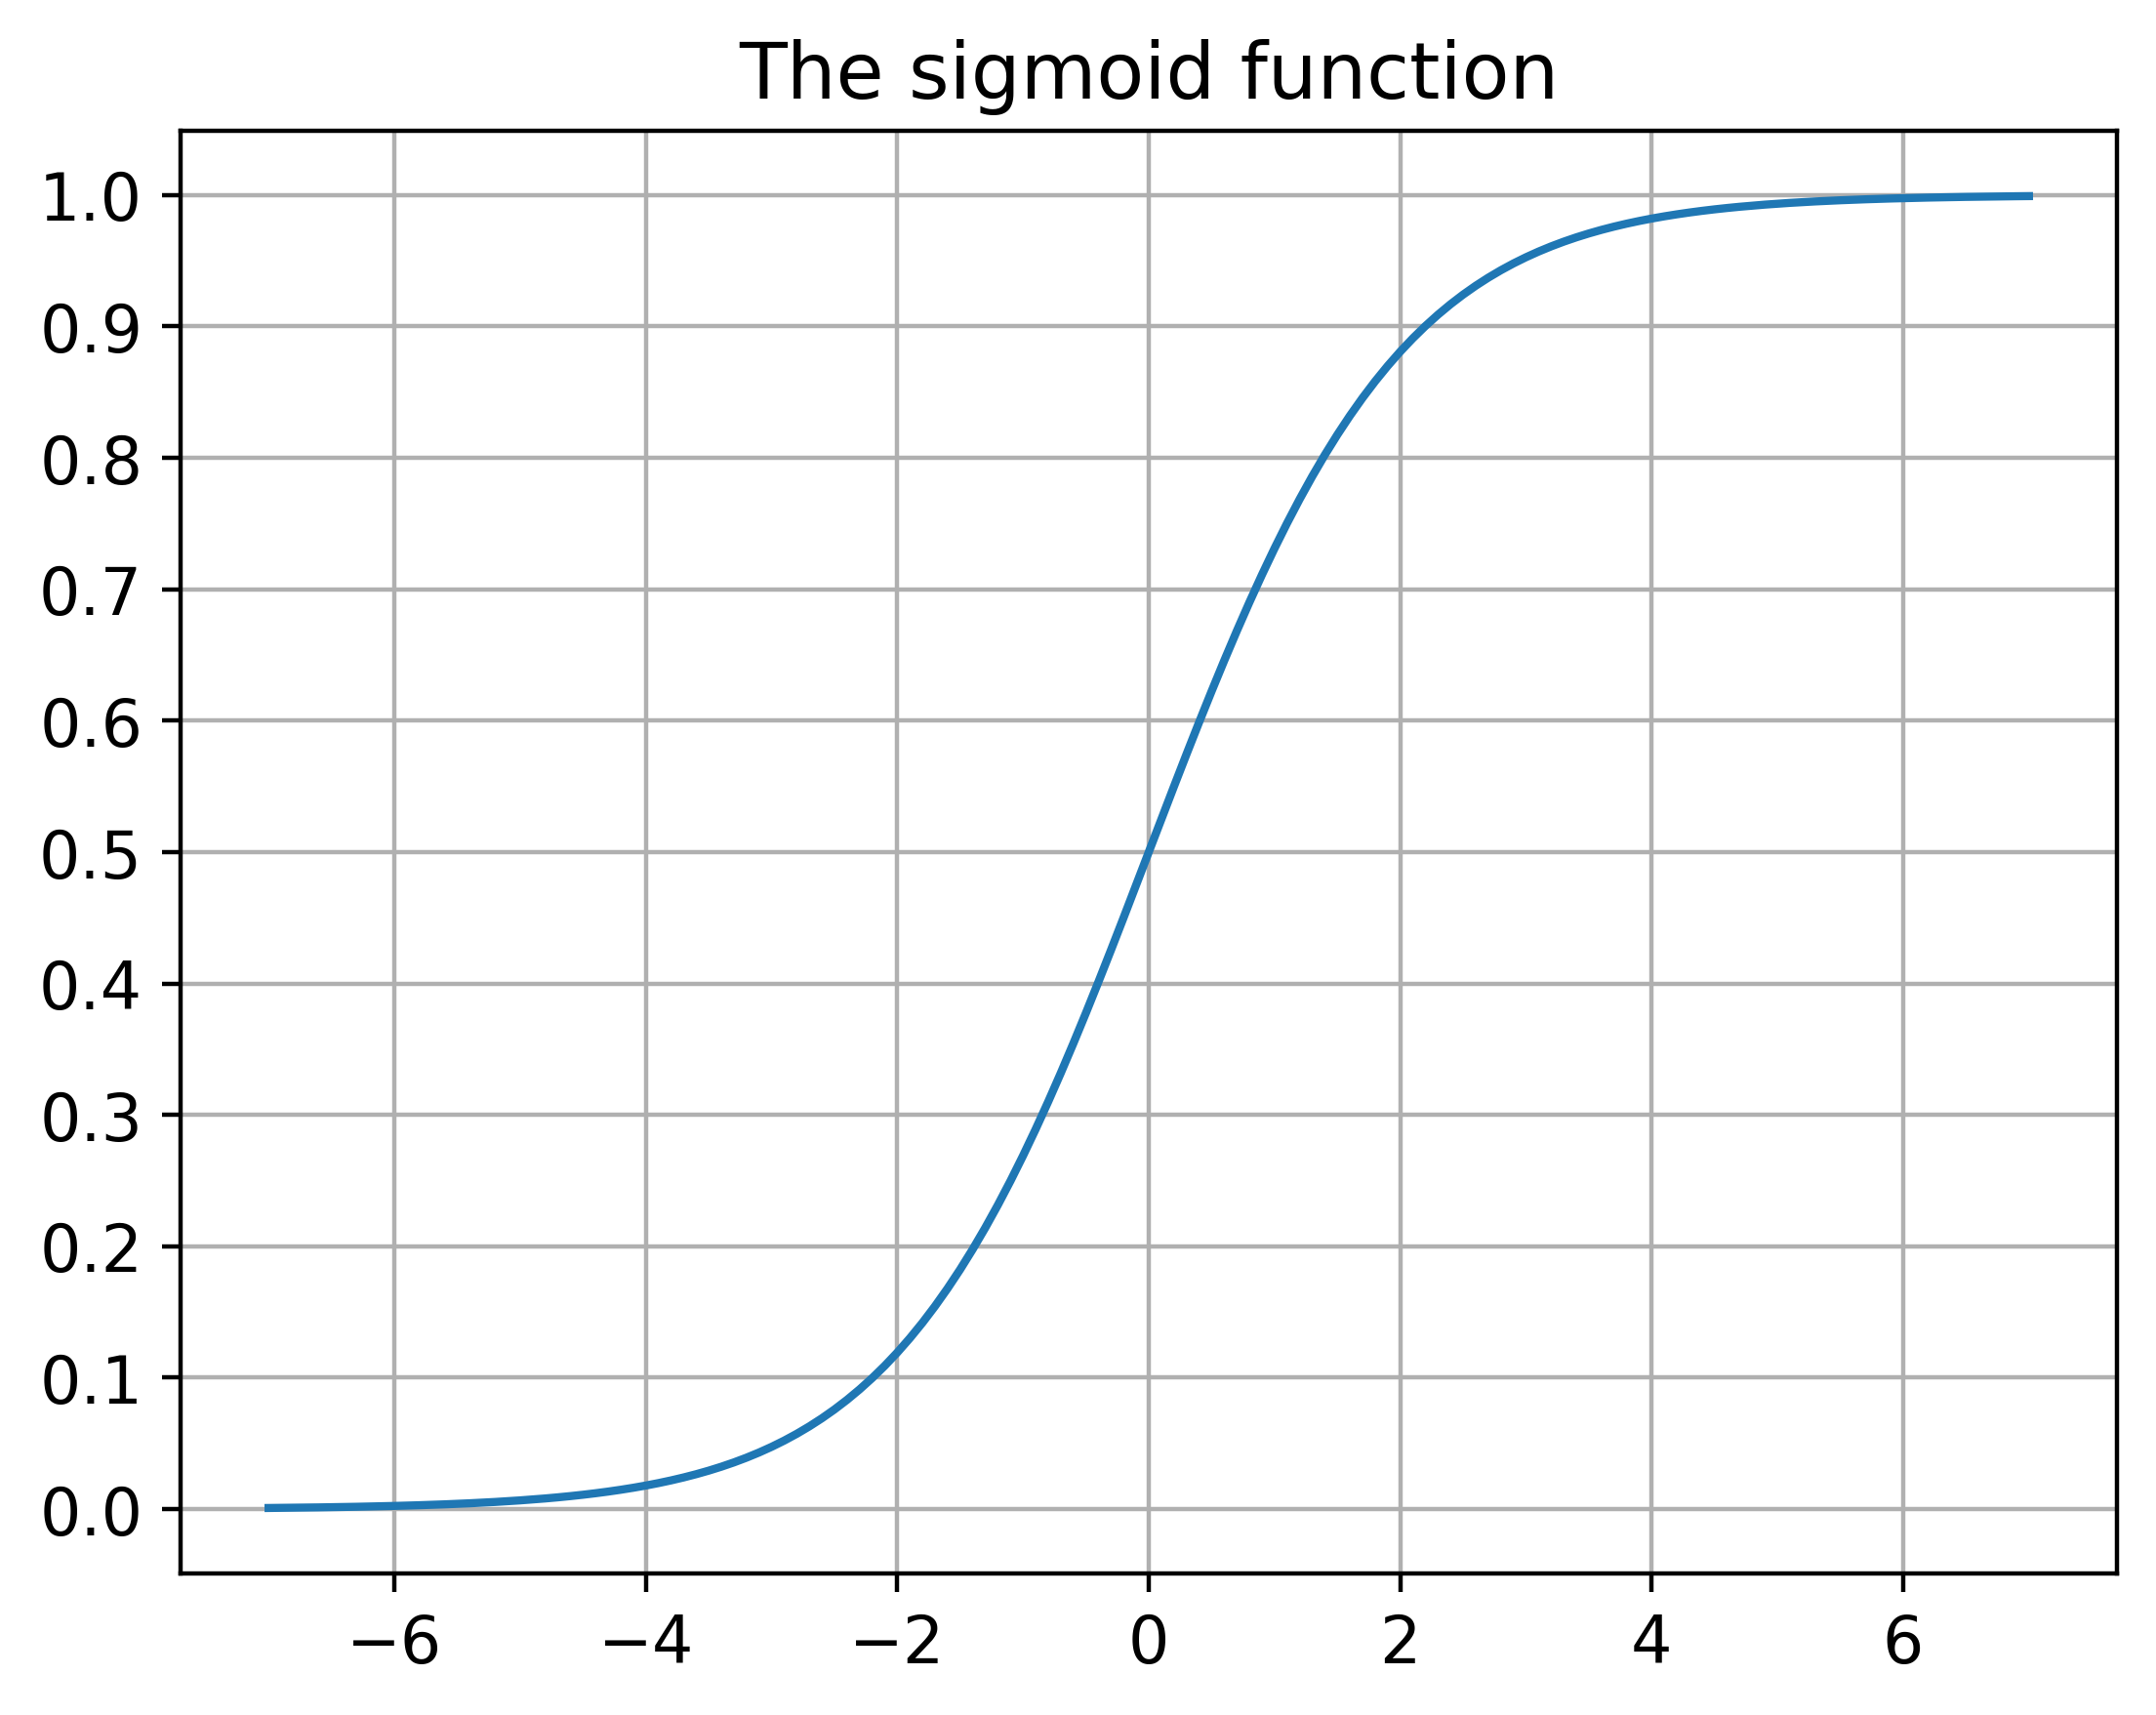

In [124]:
X_sig = np.linspace(-7, 7, 141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.title('The sigmoid function')

Essa imagem coincide com o que esperávamos. Além disso, podemos ver que sigmoid(0) = 0.5. O que a função sigmóide tem de especial? A saída dessa função fica estritamente entre 0 e 1. Essa é uma boa propriedade para uma função que deve prever probabilidades. Tecnicamente as probabilidades podem ser exatamente iguais a 0 e 1, embora a função sigmóide nunca seja. No entanto, ela chega perto demais para que essa seja uma limitação prática.

Você deve lembrar-se de que descrevemos a regressão logística como produzindo probabilidades previstas de associação de classe em vez de prever diretamente a associação. Isso permite uma implementação mais flexível da regressão logística, possibilitando a seleção da probabilidade limite. A função sigmóide é a fonte dessas probabilidades previstas. Em breve veremos como as diferentes características são usados no cálculo das probabilidades previstas.

## Examinando a conveniência das características para a regressão logística

# Referencia

* KLOSTERMAN, Stephen. Projeto de Ciência de Dados com
Python. Novatec, 2019.